In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage

## Part 1
DOMAIN: Automobile 

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 
continuous attributes 

• DATA DESCRIPTION: The data concerns city-cycle fuel consumption in miles per gallon 

• Attribute Information: 
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

• PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 
Steps and tasks: 
1. Import and warehouse data: 

• Import all the given datasets and explore shape and size. 
• Merge all datasets onto one and explore final shape and size.
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
• Import the data from above steps into python.

2. Data cleansing: 

• Missing/incorrect value treatment
• Drop attribute/s if required using relevant functional knowledge
• Perform another kind of corrections/treatment on the data.

3. Data analysis & visualisation: 

• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create 
your own features if required. Be highly experimental and analytical here to find hidden patterns.

4. Machine learning: 
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 
• Share your insights about the difference in using these two methods. 

5. Answer below questions based on outcomes of using ML based methods. 
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
• Use linear regression model on different clusters separately and print the coefficients of the models individually
• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without 
clustering? Mention how it impacts performance and prediction.

6. Improvisation: 
• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to 
perform a better data analysis in future.

## Importing all the given datasets and explore shape and size.


In [2]:
data1=pd.read_json("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part1 - Car-Attributes.json")

In [3]:
print("shape of data1: {}".format(data1.shape))

shape of data1: (398, 8)


In [4]:
print("size of S data1: {}".format(data1.size))

size of S data1: 3184


In [5]:
data2=pd.read_csv("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part1 - Car name.csv")

In [6]:
print("shape of data2: {}".format(data2.shape))

shape of data2: (398, 1)


In [7]:
print("size of S data2: {}".format(data2.size))

size of S data2: 398


 #### Merging all datasets onto one dat dataframe and explore final shape and size.

In [8]:
data = pd.merge(data1, data2,left_index=True, right_index=True)

data

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]

In [9]:
print("shape of data: {}".format(data.shape))

shape of data: (398, 9)


In [10]:
print("size of S data: {}".format(data.size))

size of S data: 3582


## Export the final dataset and store it on local machine as Part1 file

In [11]:
data.to_csv("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part1.csv")

In [12]:
cardata=pd.read_csv("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part1.csv");
cardata

Unnamed: 0   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0             0  18.0    8  307.0  130  3504  12.0  70       1   
1             1  15.0    8  350.0  165  3693  11.5  70       1   
2             2  18.0    8  318.0  150  3436  11.0  70       1   
3             3  16.0    8  304.0  150  3433  12.0  70       1   
4             4  17.0    8  302.0  140  3449  10.5  70       1   
..          ...   ...  ...    ...  ...   ...   ...  ..     ...   
393         393  27.0    4  140.0   86  2790  15.6  82       1   
394         394  44.0    4   97.0   52  2130  24.6  82       2   
395         395  32.0    4  135.0   84  2295  11.6  82       1   
396         396  28.0    4  120.0   79  2625  18.6  82       1   
397         397  31.0    4  119.0   82  2720  19.4  82       1   

                      car_name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino  
..                         ...  
393            ford mustang gl  
394                  vw pickup  
395              dodge rampage  
396                ford ranger  
397                 chevy s-10  

[398 rows x 10 columns]

In [13]:
#### importing data set using python

##  Data cleansing:
• Missing/incorrect value treatment

• Drop attribute/s if required using relevant functional knowledge

• Perform another kind of corrections/treatment on the data

In [14]:
# Check for missing value
cardata.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
wt            0
acc           0
yr            0
origin        0
car_name      0
dtype: int64

In [15]:
cardata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  398 non-null    int64  
 1   mpg         398 non-null    float64
 2   cyl         398 non-null    int64  
 3   disp        398 non-null    float64
 4   hp          398 non-null    object 
 5   wt          398 non-null    int64  
 6   acc         398 non-null    float64
 7   yr          398 non-null    int64  
 8   origin      398 non-null    int64  
 9   car_name    398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


As checked above,float64 are 3 features, int64 are 5 features and 2 are categorical

In [16]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
cardata[data['hp']=="?"]

Unnamed: 0   mpg  cyl   disp hp    wt   acc  yr  origin  \
32           32  25.0    4   98.0  ?  2046  19.0  71       1   
126         126  21.0    6  200.0  ?  2875  17.0  74       1   
330         330  40.9    4   85.0  ?  1835  17.3  80       2   
336         336  23.6    4  140.0  ?  2905  14.3  80       1   
354         354  34.5    4  100.0  ?  2320  15.8  81       2   
374         374  23.0    4  151.0  ?  3035  20.5  82       1   

                 car_name  
32             ford pinto  
126         ford maverick  
330  renault lecar deluxe  
336    ford mustang cobra  
354           renault 18i  
374        amc concord dl

In [17]:
cardata['hp'].replace("?",np.nan, inplace=True)

#### replacing null with NAN values in whole dataset

In [18]:
# Now try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median 
import seaborn as sns
hp = cardata['hp'].dropna()
hp.count()

392

#### There are 398 such values

C:\Users\nainap\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

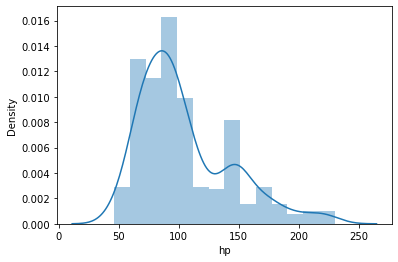

In [19]:
sns.distplot(pd.to_numeric(hp))

In [20]:
# Since this does not look to be normally distributed, let us impute by using median
cardata['hp'].fillna((cardata['hp'].median()), inplace=True)
cardata['hp'] = cardata['hp'].astype('float')

In [21]:
cardata.dtypes

Unnamed: 0      int64
mpg           float64
cyl             int64
disp          float64
hp            float64
wt              int64
acc           float64
yr              int64
origin          int64
car_name       object
dtype: object

### Observation:Except for car_name all are int  or float

In [22]:
cardata.drop(cardata.columns[cardata.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#### dropping unnamed columns as they do not hold any meaning

In [23]:
cardata.corr(method='kendall')

mpg       cyl      disp        hp        wt       acc        yr  \
mpg     1.000000 -0.686477 -0.679847 -0.673377 -0.694006  0.301096  0.413661   
cyl    -0.686477  1.000000  0.794854  0.682006  0.735481 -0.367194 -0.273742   
disp   -0.679847  0.794854  1.000000  0.711556  0.800508 -0.352110 -0.218920   
hp     -0.673377  0.682006  0.711556  1.000000  0.696368 -0.482267 -0.274888   
wt     -0.694006  0.735481  0.800508  0.696368  1.000000 -0.268619 -0.196863   
acc     0.301096 -0.367194 -0.352110 -0.482267 -0.268619  1.000000  0.196024   
yr      0.413661 -0.273742 -0.218920 -0.274888 -0.196863  0.196024  1.000000   
origin  0.467249 -0.551610 -0.570074 -0.402494 -0.496185  0.173055  0.136967   

          origin  
mpg     0.467249  
cyl    -0.551610  
disp   -0.570074  
hp     -0.402494  
wt     -0.496185  
acc     0.173055  
yr      0.136967  
origin  1.000000

#### origin attribute is splitted into origin_1,origin_2 and origin_3
wt and mpg are higly negatively correlated
wt and cyl are highly positively correlated attributes

## Univariate analysis

In [24]:
def plotKdeAndBoxPlot(data, x, feature_name, color):
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(x = x, data=cardata,  orient='h' , ax=axes[1],color=color)
    sns.kdeplot(data=cardata,x=x, ax=axes[0],fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=1)
    axes[0].set_title('Distribution plot for '+feature_name)
    axes[1].set_title('Box plot for '+ feature_name)
    plt.show()
    return

### Box Plot and Bar Plot of mpg,hp,yr and origin features 

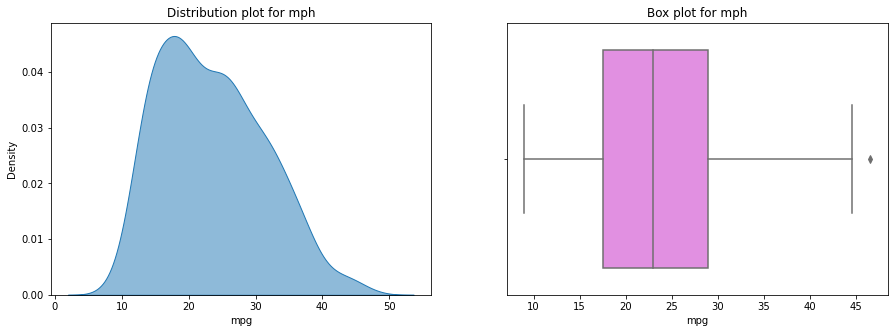

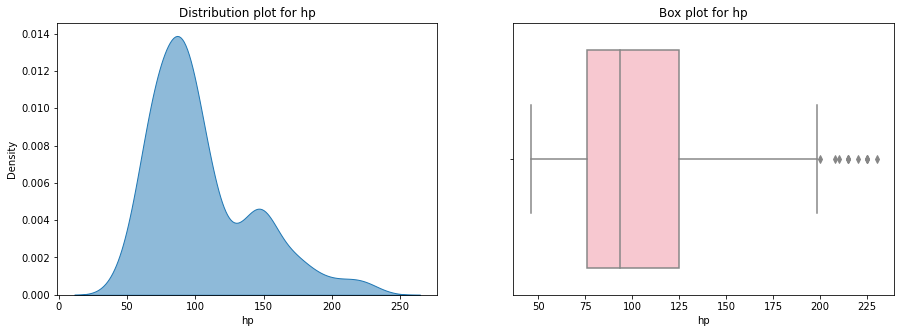

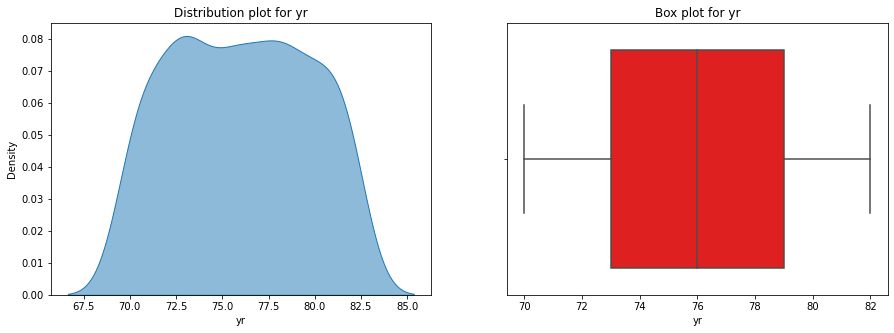

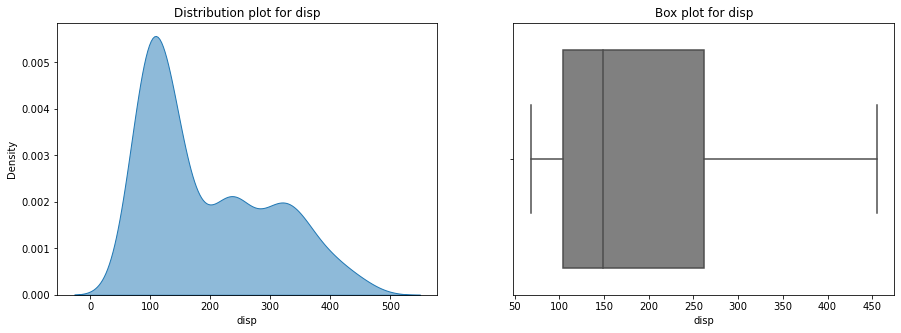

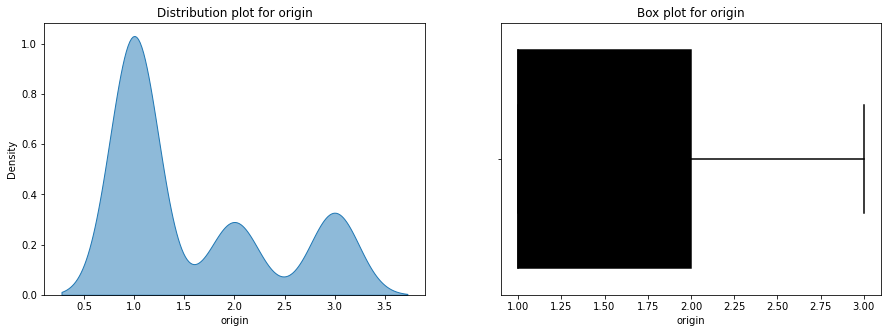

In [25]:
plotKdeAndBoxPlot(data,'mpg','mph','Violet')
plotKdeAndBoxPlot(data,'hp','hp','Pink')
plotKdeAndBoxPlot(data,'yr','yr','Red')
plotKdeAndBoxPlot(data,'disp','disp','Grey')
plotKdeAndBoxPlot(data,'origin','origin','Black')


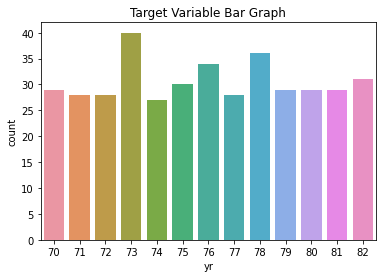

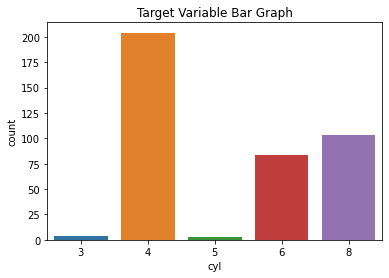

In [26]:
sns.countplot(x='yr',data=cardata).set_title('Target Variable Bar Graph')
plt.show()
sns.countplot(x='cyl',data=cardata).set_title('Target Variable Bar Graph')
plt.show()


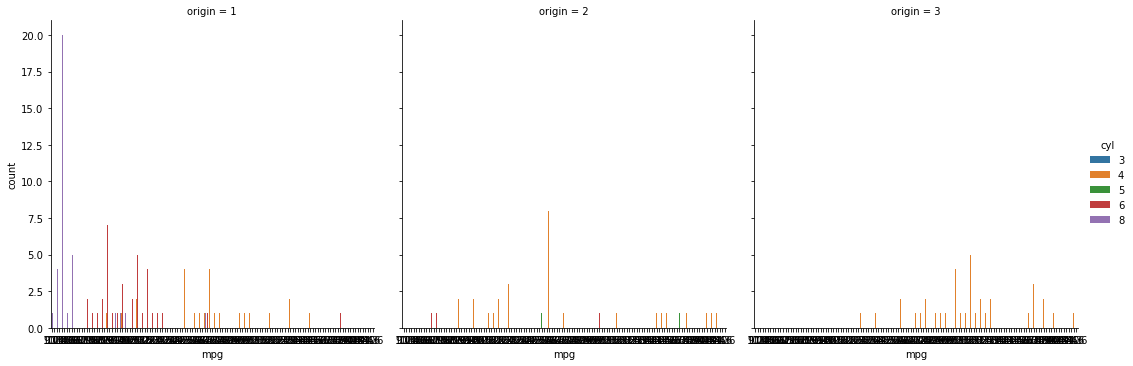

In [27]:
sns.catplot(x='mpg', hue='cyl', col='origin', data=cardata, kind='count')
plt.show()

ploting bar of age feature.Maximum count is of 73 yrs

checking value counts of few features

In [28]:
data["mpg"].value_counts()
data["yr"].value_counts()
data["disp"].value_counts()
data["cyl"].value_counts()


4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

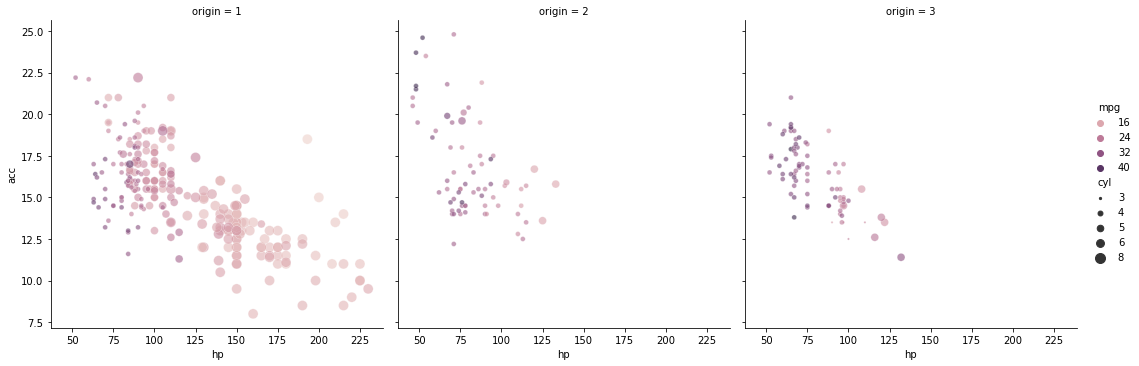

In [29]:
'''In this plot we analyze the relationship of hp & acc
bifurcated by origin, mpg & cyl in a single plot.'''

sns.relplot(x='hp', y='acc', hue='mpg', #style='mpg_level',
            size='cyl', col='origin', data=cardata, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

In every region there is a negative relation b/w hp & acc
vehicles with low mpg has low acc and high hp.
vehicles with more cyl has low acc and high hp.

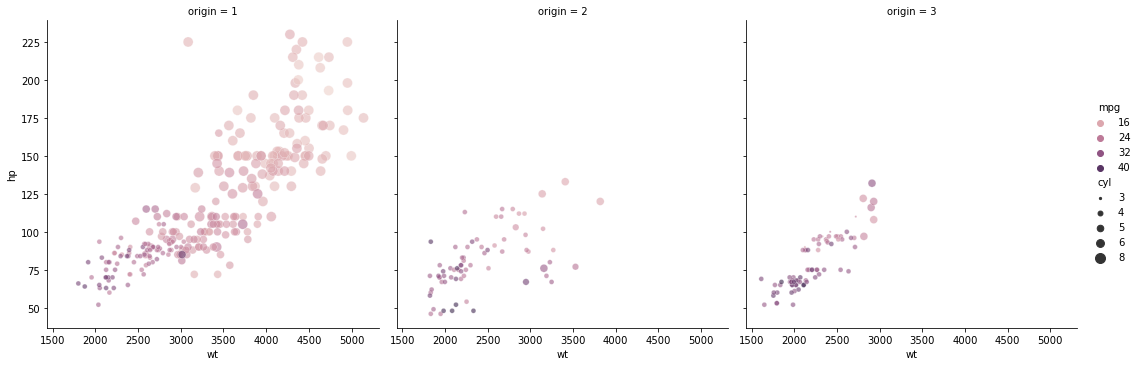

In [30]:
'''In this plot we analyze the relationship of wt & hp
bifurcated by origin, mpg & cyl in a single plot.'''

sns.relplot(x='wt', y='hp', hue='mpg', #style='mpg_level',
            size='cyl', col='origin', data=cardata, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

In every region there is a positive relation b/w wt & hp.
vehicles with low mpg has high wt & hp.
vehicles with more cyl has high wt & hp.

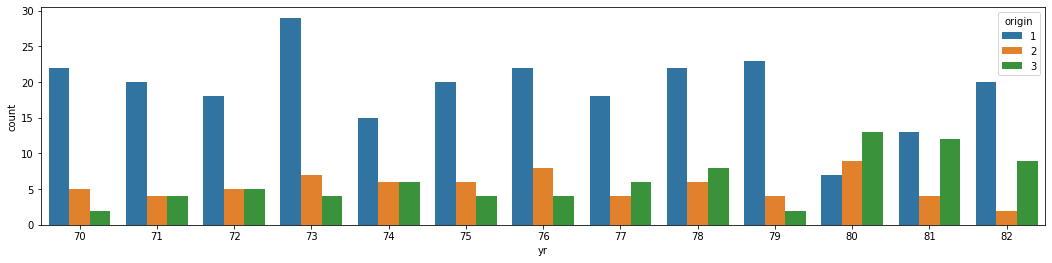

In [31]:
fig = plt.figure(1, (18,4))
sns.countplot(x='yr', hue='origin', data=cardata)
plt.show()

In the starting year manufacturing in USA is dominated compeletely.
As the year progresses japan and europe started manufacturing more vehicles. Infact in the year 80 both japan and europe manufactured more than USA. This may be due to something because throught the years USA dominates and suddenly there is a considerable decrease in their manufacturing. This may have something to do in USA in year 80.
Initially europe manufactures more vehicle then japan but then japan exceeds it after 76.

Let's analyse car_company

In [32]:
top_car_companies = cardata.car_name.value_counts()[:15].index
top_car_companies

Index(['ford pinto', 'amc matador', 'ford maverick', 'toyota corolla',
       'amc hornet', 'chevrolet chevette', 'peugeot 504', 'chevrolet impala',
       'amc gremlin', 'toyota corona', 'chevrolet nova', 'plymouth fury iii',
       'ford galaxie 500', 'honda civic', 'chevrolet caprice classic'],
      dtype='object')

In [33]:
df_cat_top_comp = cardata[cardata.car_name.isin(top_car_companies)]
df_cat_top_comp.shape

(60, 9)

We can see that top 15 car companies alone manufactures 83% of vehicles.

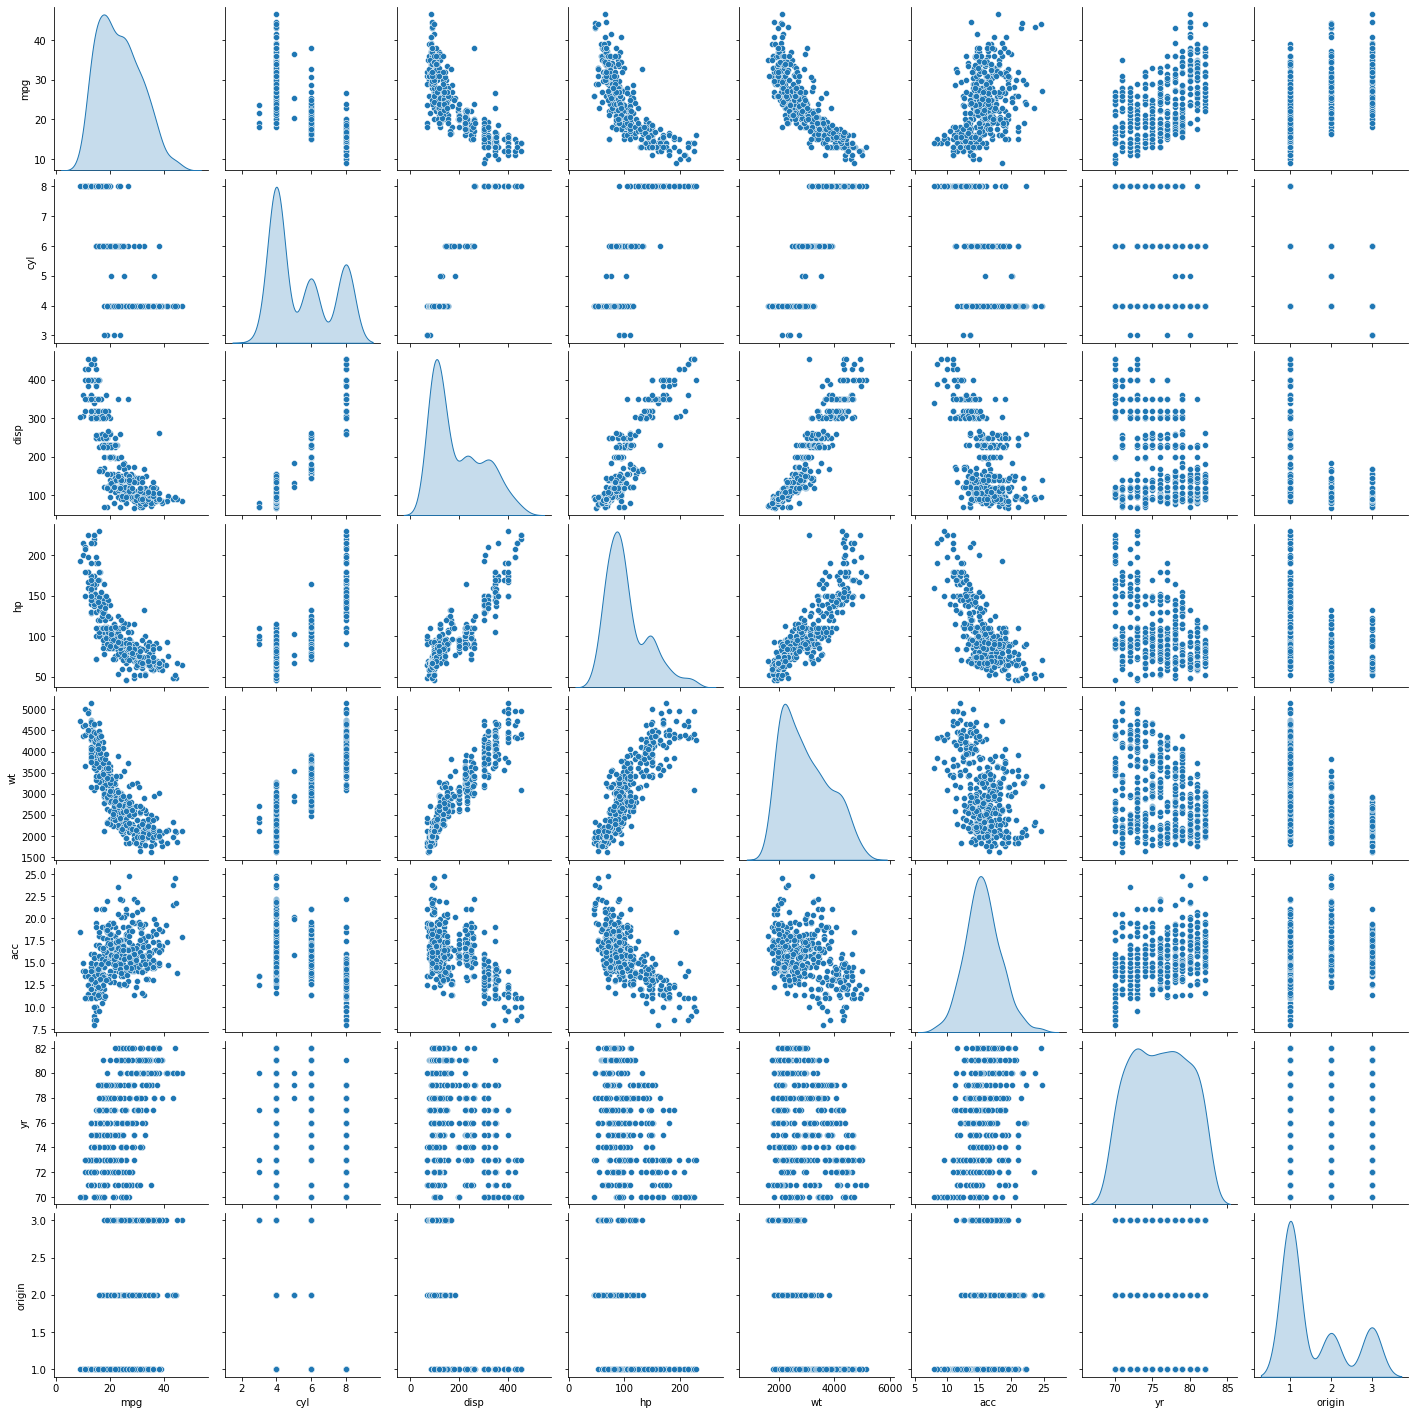

In [34]:
sns.pairplot(cardata,diag_kind='kde')

Observations from diagonal plots we can see origin has 3 points (evident from data)
yr - shows two peaks majorily
 acc,mpg are nearly normal cyl and disp shows 3 clusters while wt shows 2
 from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
 
(correlation too gives high negative correlation)

Cyl too shows negative correlation with levels

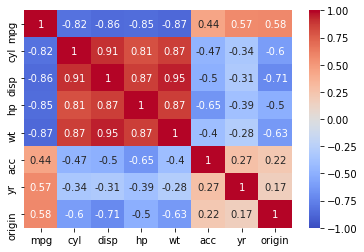

In [35]:
sns.heatmap(cardata.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

as mpg increases disp, hp & wt decreases but acc increases.
as hp increases disp & wt increases but acc decreases.
as wt increases disp increases but acc decreases.
as acc increases disp decreases.

In [36]:
cardata.groupby(cardata['cyl']).mean()

mpg        disp          hp           wt        acc         yr  \
cyl                                                                         
3    20.550000   72.500000   99.250000  2398.500000  13.250000  75.500000   
4    29.286765  109.796569   78.654412  2308.127451  16.601471  77.073529   
5    27.366667  145.000000   82.333333  3103.333333  18.633333  79.000000   
6    19.985714  218.142857  101.410714  3198.226190  16.263095  75.928571   
8    14.963107  345.009709  158.300971  4114.718447  12.955340  73.902913   

       origin  
cyl            
3    3.000000  
4    1.985294  
5    2.000000  
6    1.190476  
8    1.000000

Performin any feature engineering/transformation and removing any duplicate or irrelevant columns

Further dig into data shows max mpg is for 4 cylinders vehicles
Origin as pointed earlier indicates production point so should be broken into dummy variables
 Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
subtract year from 83 to get the age
Other continuous variables should be checked for outliers and should be normlized using z-score

In [37]:
# Calculate age of vehicle
cardata['age'] = 83-cardata['yr']
cardata.head()

mpg  cyl   disp     hp    wt   acc  yr  origin                   car_name  \
0  18.0    8  307.0  130.0  3504  12.0  70       1  chevrolet chevelle malibu   
1  15.0    8  350.0  165.0  3693  11.5  70       1          buick skylark 320   
2  18.0    8  318.0  150.0  3436  11.0  70       1         plymouth satellite   
3  16.0    8  304.0  150.0  3433  12.0  70       1              amc rebel sst   
4  17.0    8  302.0  140.0  3449  10.5  70       1                ford torino   

   age  
0   13  
1   13  
2   13  
3   13  
4   13

In [38]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(cardata['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
cardata = cardata.join(one_hot)
cardata.head()

mpg  cyl   disp     hp    wt   acc  yr  origin                   car_name  \
0  18.0    8  307.0  130.0  3504  12.0  70       1  chevrolet chevelle malibu   
1  15.0    8  350.0  165.0  3693  11.5  70       1          buick skylark 320   
2  18.0    8  318.0  150.0  3436  11.0  70       1         plymouth satellite   
3  16.0    8  304.0  150.0  3433  12.0  70       1              amc rebel sst   
4  17.0    8  302.0  140.0  3449  10.5  70       1                ford torino   

   age  origin_1  origin_2  origin_3  
0   13         1         0         0  
1   13         1         0         0  
2   13         1         0         0  
3   13         1         0         0  
4   13         1         0         0

Every attribute except car_name is of interest and participated in our analysis. So we will not add car_name to our dataframe as it is of no interest. This is feature reduction and is an integral part of feature engineering.

In [39]:
# Let us now remove duplicate/irrelevant columns

cars_new = cardata.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

mpg  cyl   disp     hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0   13         1         0         0
1  15.0    8  350.0  165.0  3693  11.5   13         1         0         0
2  18.0    8  318.0  150.0  3436  11.0   13         1         0         0
3  16.0    8  304.0  150.0  3433  12.0   13         1         0         0
4  17.0    8  302.0  140.0  3449  10.5   13         1         0         0

 Create new data frame with standardize variables and imputation for any missing/outliers

Missing value check was done above and hp column was treated with median values
Let us check for outliers now

<AxesSubplot:>

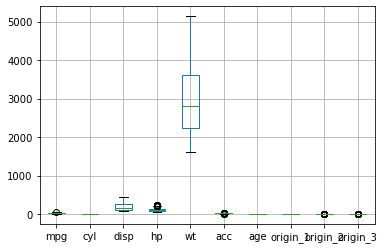

In [40]:
cars_new.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c64cdc74f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c64cdc7bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c64cdc7190>],
 'medians': [<matplotlib.lines.Line2D at 0x1c64cdd22b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c64cdd2610>],
 'means': []}

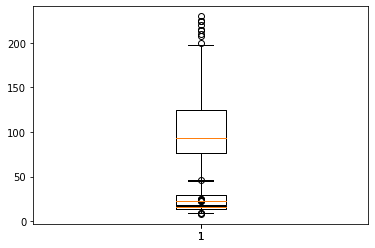

In [41]:
# We could see some outliers for mpg,hp and acc
plt.boxplot(cars_new['mpg'])
plt.boxplot(cars_new['acc'])
plt.boxplot(cars_new['hp'])

In [42]:
# Let us take logaritmic transform for hp,mpg and acc to remove outliers
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()

mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

<AxesSubplot:>

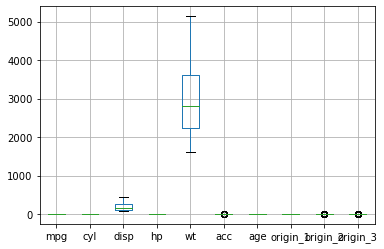

In [43]:
cars_new.boxplot()

In [44]:
# This looks better.
# Now let us try to scale the variables
from scipy.stats import zscore

cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)

In [45]:
cars_new.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

##  Machine learning: 
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. 


In [46]:
# Variables are now scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

C:\Users\nainap\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


num_clusters  cluster_errors
0              1     3000.226131
1              2     1435.627826
2              3     1072.434353
3              4      873.696202
4              5      786.882347
5              6      721.242538
6              7      676.641622
7              8      634.595334
8              9      595.820508
9             10      565.719436
10            11      527.053763
11            12      508.515417
12            13      479.829723
13            14      460.499738

# Identifying the appropriate clusters with result from above finding

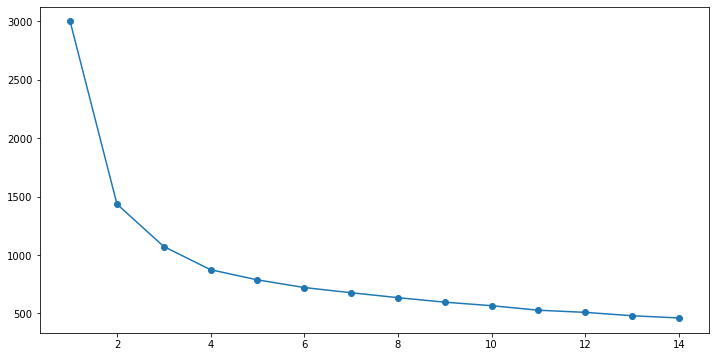

In [47]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## From the above elbow curve we could see the bend at 4, so let us create 4 custers

In [48]:

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)

kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

Centroids are listed below

In [49]:
kmeans.cluster_centers_

array([[-1.30629972e+00,  1.49819126e+00,  1.50392292e+00,
         1.44265580e+00,  1.40409797e+00, -1.15022628e+00,
         6.88323847e-01,  1.00000000e+00, -2.49800181e-16,
         8.32667268e-17],
       [ 1.08052956e+00, -8.21103514e-01, -7.73033976e-01,
        -7.99132185e-01, -7.48370271e-01,  4.26220045e-01,
        -1.08735830e+00,  4.10256410e-01,  1.88034188e-01,
         4.01709402e-01],
       [ 3.37373388e-01, -8.68583653e-01, -8.24059183e-01,
        -5.45072859e-01, -7.70282170e-01,  3.08194952e-01,
         6.57116455e-01,  2.50000000e-01,  4.68750000e-01,
         2.81250000e-01],
       [-3.95798123e-01,  4.24430369e-01,  3.09735186e-01,
         1.12261708e-01,  3.24408797e-01,  3.15019884e-01,
        -6.20550104e-03,  9.12087912e-01,  3.29670330e-02,
         5.49450549e-02]])

# Checking for no of values in each cluster and centers for each variables

In [50]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 94 117  96  91]


checking number of data in each clusters

In [51]:
# Distribution looks fine.
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

0         1         2         3
mpg      -1.306300e+00  1.080530  0.337373 -0.395798
cyl       1.498191e+00 -0.821104 -0.868584  0.424430
disp      1.503923e+00 -0.773034 -0.824059  0.309735
hp        1.442656e+00 -0.799132 -0.545073  0.112262
wt        1.404098e+00 -0.748370 -0.770282  0.324409
acc      -1.150226e+00  0.426220  0.308195  0.315020
age       6.883238e-01 -1.087358  0.657116 -0.006206
origin_1  1.000000e+00  0.410256  0.250000  0.912088
origin_2 -2.498002e-16  0.188034  0.468750  0.032967
origin_3  8.326673e-17  0.401709  0.281250  0.054945

### Group 1 has highest values for mpg while 3rd has lowest
### Group 0 has max no of cylinders and 2 forms of lower cylinder values
### As seen in correlation and pairplot, Group 0 has highest values for hp,wt and displ
### Group 1 seems to be comprising of newest cars
### Group 3 and 0 seems to be originated at point 3, while 2 in 2nd point and 1 again at point 3

##  Assign the groups created above to data frame and study the characteristics for each group.

In [52]:
# Add cluster number to original cars data
predictions = kmeans.predict(cars_new)
predictions
cardata["group"] = predictions
cardata['group'] = cardata['group'].astype('category')
cardata.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
car_name      object
age            int64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

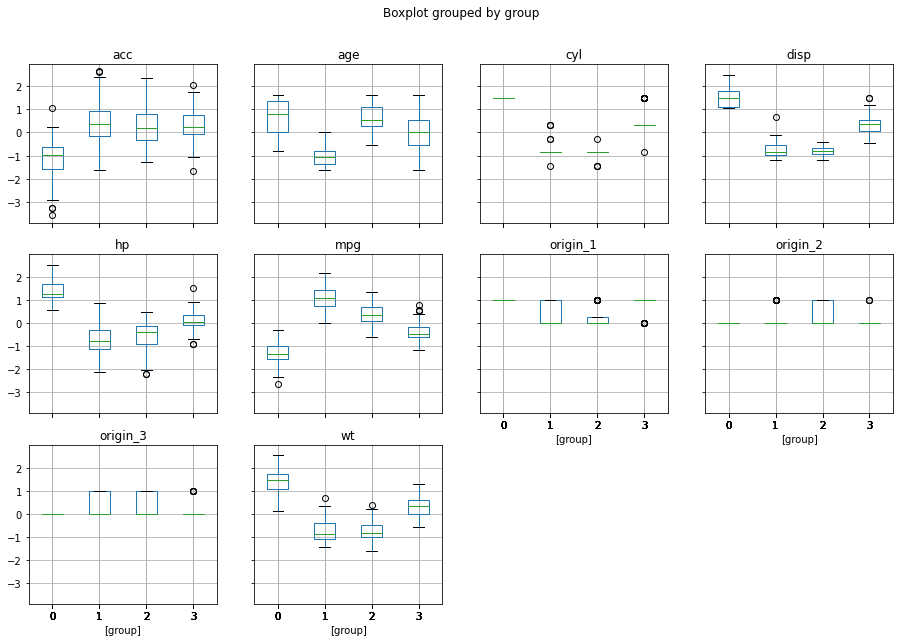

In [53]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

### Group 0 is characterised by lower acc, comparitely old models, higher wt, hp but lowest mpg with origin at 1
### Group 1 -Highest mpg, lower wt and hp. Lower age limits suggest comparitevly newer cars. Origin looks more 2
### Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration
### Group 3 - Again slighlty higher in wt origin code as 1. Better performance in terms of mpg

### next step is to perform Heirarchical clustering on the cars_new dataset .so we are removing group feature form it

## Dropping group 


In [54]:
cars_new1 = cars_new.drop(['group'], axis =1)

cars_new1.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

## Clustering

In [55]:
cars_new1.head(5)

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

In [56]:
model = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',  linkage='average')

Choosing cluster as 4 and linkage method as average and euclidean as distance measure

In [57]:
model.fit(cars_new1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [58]:
cars_new1['labels'] = model.labels_
cars_new1.head(20)

mpg       cyl      disp        hp        wt       acc       age  \
0  -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1  -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2  -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3  -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4  -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   
5  -1.159493  1.498191  2.262118  2.059602  1.620492 -2.363838  1.627426   
6  -1.362874  1.498191  2.502182  2.369121  1.635863 -2.947553  1.627426   
7  -1.362874  1.498191  2.367746  2.301584  1.586204 -3.264219  1.627426   
8  -1.362874  1.498191  2.511784  2.435140  1.719809 -2.363838  1.627426   
9  -1.159493  1.498191  1.887617  1.938441  1.039961 -3.264219  1.627426   
10 -1.159493  1.498191  1.820399  1.611692  0.700628 -2.363838  1.627426   
11 -1.362874  1.498191  1.407489  1.433594  0.755016 -3.600090  1.627426   
12 -1.159493  1.498191  1.983643  1.243998  0.934732 -2.648012  1.627426   
13 -1.362874  1.498191  2.511784  2.435140  0.136650 -2.363838  1.627426   
14  0.226011 -0.856321 -0.772295 -0.097829 -0.707544 -0.117496  1.627426   
15 -0.030486  0.320935  0.043923 -0.097829 -0.162483  0.064164  1.627426   
16 -0.622035  0.320935  0.053526 -0.036625 -0.232242  0.064164  1.627426   
17 -0.167620  0.320935  0.063128 -0.424579 -0.453340  0.240057  1.627426   
18  0.573219 -0.856321 -0.925936 -0.322683 -0.993671 -0.305316  1.627426   
19  0.461966 -0.856321 -0.925936 -2.228367 -1.342463  1.613110  1.627426   

    origin_1  origin_2  origin_3  labels  
0          1         0         0       1  
1          1         0         0       1  
2          1         0         0       1  
3          1         0         0       1  
4          1         0         0       1  
5          1         0         0       1  
6          1         0         0       1  
7          1         0         0       1  
8          1         0         0       1  
9          1         0         0       1  
10         1         0         0       1  
11         1         0         0       1  
12         1         0         0       1  
13         1         0         0       1  
14         0         0         1       2  
15         1         0         0       0  
16         1         0         0       0  
17         1         0         0       0  
18         0         0         1       2  
19         0         1         0       2

In [59]:
cars_new1.mean()

mpg         4.435313e-16
cyl        -5.171742e-16
disp       -8.312725e-17
hp         -3.288826e-16
wt         -9.902743e-17
acc         2.194225e-15
age        -1.304373e-15
origin_1    6.256281e-01
origin_2    1.758794e-01
origin_3    1.984925e-01
labels      1.369347e+00
dtype: float64

Checking mean of all data

### loading required libraries

In [60]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_new1, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(cars_new1))

c

0.782212397100917

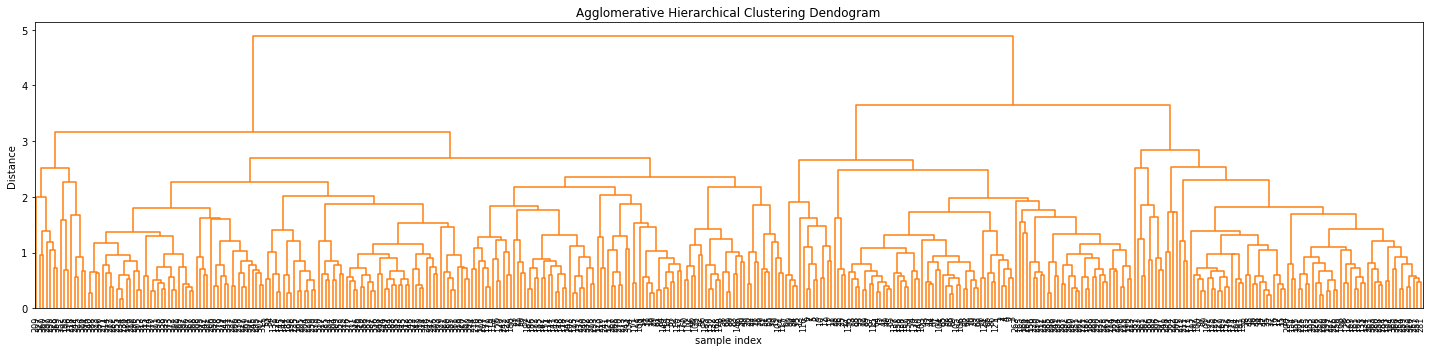

In [62]:
plt.figure(figsize=(20, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [63]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_new1, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(cars_new))

c

0.7031971779388916

Cophenetic distance is used in dendograms.

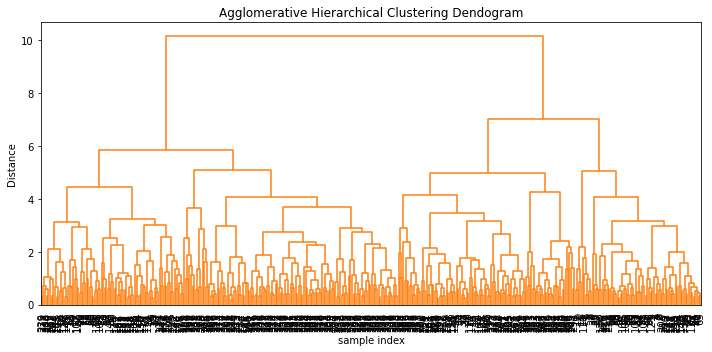

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [65]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_new1, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(cars_new1))

c

0.7648841199453035

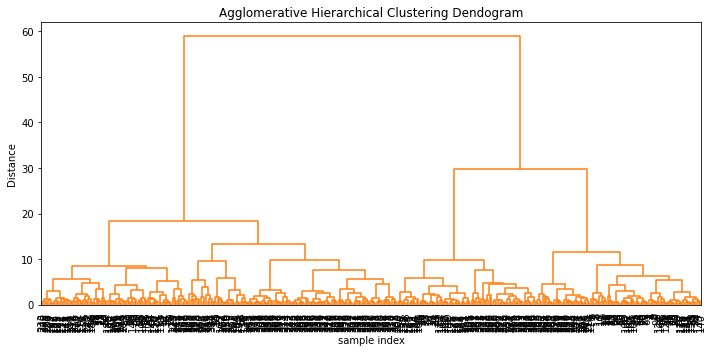

In [66]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

## Applying LR 

In [67]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


Putting all clusters in separate dataframes

In [68]:
df1=cars_new[cars_new.group==0]
df2=cars_new[cars_new.group==1]
df3=cars_new[cars_new.group==2]
df4=cars_new[cars_new.group==3]


In [69]:
df1.head(5)

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  group  
0         1         0         0      0  
1         1         0         0      0  
2         1         0         0      0  
3         1         0         0      0  
4         1         0         0      0

### defining X and Y axis fro all clustered dataframes

In [70]:
X1 = df1.drop(['origin_1','origin_2','origin_3','mpg','group'], axis =1)

y1 = df1['mpg']

X2 = df2.drop(['origin_1','origin_2','origin_3','mpg','group'], axis =1)

y2 = df2['mpg']

X3 = df3.drop(['origin_1','origin_2','origin_3','mpg','group'], axis =1)

y3 = df3['mpg']

X4 = df4.drop(['origin_1','origin_2','origin_3','mpg','group'], axis =1)

y4 = df4['mpg']


In [71]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, random_state=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=1)


In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train1, y_train1)


LinearRegression()

In [73]:
for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {} for df1".format(col_name, regression_model.coef_[idx]))
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {} for df2".format(col_name, regression_model.coef_[idx]))
for idx, col_name in enumerate(X_train3.columns):
    print("The coefficient for {} is {} for df3".format(col_name, regression_model.coef_[idx]))
for idx, col_name in enumerate(X_train4.columns):
    print("The coefficient for {} is {} for df4".format(col_name, regression_model.coef_[idx]))
    

The coefficient for cyl is 0.0 for df1
The coefficient for disp is 0.10008885388187597 for df1
The coefficient for hp is -0.5352035227620442 for df1
The coefficient for wt is -0.21310006093965433 for df1
The coefficient for acc is -0.2299685007253114 for df1
The coefficient for age is -0.22890306895218376 for df1
The coefficient for cyl is 0.0 for df2
The coefficient for disp is 0.10008885388187597 for df2
The coefficient for hp is -0.5352035227620442 for df2
The coefficient for wt is -0.21310006093965433 for df2
The coefficient for acc is -0.2299685007253114 for df2
The coefficient for age is -0.22890306895218376 for df2
The coefficient for cyl is 0.0 for df3
The coefficient for disp is 0.10008885388187597 for df3
The coefficient for hp is -0.5352035227620442 for df3
The coefficient for wt is -0.21310006093965433 for df3
The coefficient for acc is -0.2299685007253114 for df3
The coefficient for age is -0.22890306895218376 for df3
The coefficient for cyl is 0.0 for df4
The coefficient 

In [74]:
regression_model.score(X_train1, y_train1)

0.6546286854968033

In [75]:
regression_model.score(X_test1, y_test1)


0.24825148398234576

In [76]:
regression_model = LinearRegression()
regression_model.fit(X_train2, y_train2)


LinearRegression()

In [77]:
regression_model.score(X_train2, y_train2)

0.621976336361119

In [78]:
regression_model.score(X_test2, y_test2)

0.5382809652963565

In [79]:
regression_model = LinearRegression()
regression_model.fit(X_train3, y_train3)


LinearRegression()

In [80]:
regression_model.score(X_train3, y_train3)

0.6079082311788194

In [81]:

regression_model.score(X_test3, y_test3)

0.5147075711050415

In [82]:
regression_model = LinearRegression()
regression_model.fit(X_train4, y_train4)


LinearRegression()

In [83]:
regression_model.score(X_train4, y_train4)

0.5435231513392462

In [84]:
regression_model.score(X_test4, y_test4)


0.3108303087174994

In [85]:

print("Cluster 1 accuracy for mpg",regression_model.score(X_test1, y_test1))
print("Cluster 2 accuracy for mpg",regression_model.score(X_test2, y_test2))
print("Cluster 3 accuracy for mpg",regression_model.score(X_test3, y_test3))
print("Cluster 4 accuracy for mpg",regression_model.score(X_test4, y_test4))

Cluster 1 accuracy for mpg -0.5483088105865033
Cluster 2 accuracy for mpg -2.9143861907739206
Cluster 3 accuracy for mpg -0.3558055113837304
Cluster 4 accuracy for mpg 0.3108303087174994


#### Applying Linear Regression on original dataset

In [86]:
# Let us now remove duplicate/irrelevant columns

X = cardata.drop(['yr','origin','car_name','mpg','group'], axis =1)
y = cardata[['mpg']]

In [87]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [88]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [89]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.39480796616482855
The coefficient for disp is 0.028945510765487577
The coefficient for hp is -0.021752207723547207
The coefficient for wt is -0.007352032065147364
The coefficient for acc is 0.06191936600761935
The coefficient for age is -0.8369338917645012
The coefficient for origin_1 is -1.7988493458374308
The coefficient for origin_2 is 1.2024336550810861
The coefficient for origin_3 is 0.5964156907563447


In [90]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 49.97962824500032


The score (R^2) for in-sample and out of sample

In [91]:
regression_model.score(X_train, y_train)

0.8141025501610559

In [92]:
regression_model.score(X_test, y_test)


0.8433135132808829

In [93]:

print("Full accuracy for mpg",regression_model.score(X_test, y_test))

Full accuracy for mpg 0.8433135132808829


as year progresses there is an increase in mpg across all origins(this we already observed in analysis on categorical data).
as year progresses there is a slight decrease in displacement, horsepower & weight of the vehicles belonging to usa but there is no significant change in japan & europe.One thing we can observe is that in the 80's all vehicles have similar displacement because unlike the 70's the distribution is not spread out (i.e., distribution is short fatty instead of tall skiny).
throughout the years acceleration remains relatively the same across all regions.


In every region there is a negative relation b/w horsepower & acceleration.
vehicles with low mpg has low acceleration and high horsepower.
vehicles with more cylinders has low acceleration and high horsepower.



## Part 2
• DOMAIN: Manufacturing 
• CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.
• DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.
Attribute Information: 
1. A, B, C, D: specific chemical composition meas

ure of the wine
2. Quality: quality of wine [ Low and High ]
• PROJECT OBJECTIVE: Goal is to build a synthetic data generation model using the existing data provided by the company.
Steps and tasks: 

1. Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [94]:
datacomp=pd.read_excel("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part2 - Company.xlsx")

In [95]:
print("shape of datacomp: {}".format(datacomp.shape))

shape of datacomp: (61, 5)


In [96]:
print("size of S datacomp: {}".format(datacomp.size))

size of S datacomp: 305


In [97]:
# Check for missing value
datacomp.isna().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [98]:
datacomp.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [99]:
datacomp.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [100]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
datacomp[datacomp['B']=="?"]

Empty DataFrame
Columns: [A, B, C, D, Quality]
Index: []

In [101]:
datacomp['B'].replace("?",np.nan, inplace=True)

Replacing ? with NAN

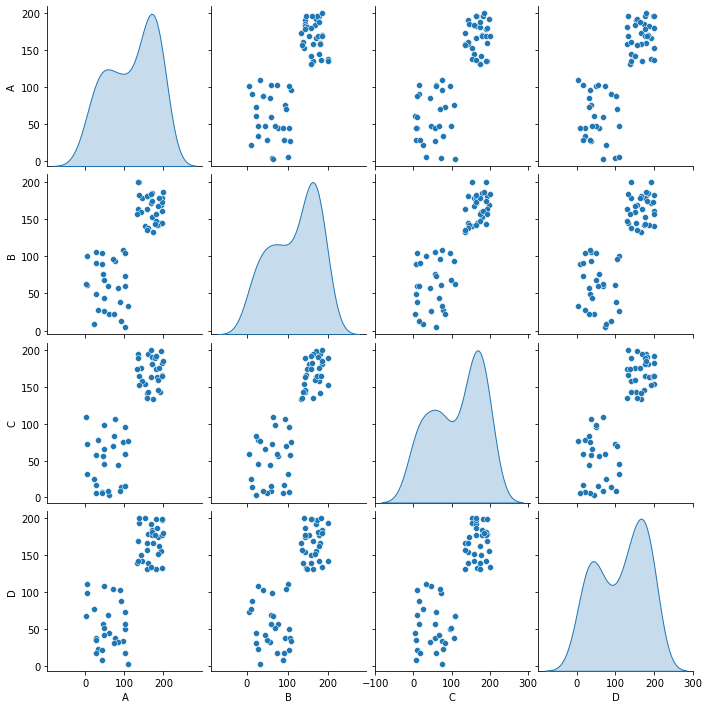

In [102]:
sns.pairplot(datacomp,diag_kind='kde')

In [103]:
# This looks better.
# Now let us try to scale the variables
from scipy.stats import zscore

datacomp.dtypes
numeric_cols = datacomp.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
datacomp[numeric_cols] =datacomp[numeric_cols].apply(zscore)

In [104]:
datacomp.head()

A         B         C         D    Quality
0 -1.168034 -1.561080 -1.061569 -0.103138  Quality A
1  0.904992  0.284923  0.306077  0.823013  Quality B
2  0.660147  0.807376  0.321443  0.264129        NaN
3 -0.939512 -1.630740 -1.706975 -1.125099  Quality A
4 -0.972158 -0.986381 -1.614775 -0.741864  Quality A

In [105]:
datacomp1 = datacomp.drop(['Quality'], axis =1)

datacomp1.head()

A         B         C         D
0 -1.168034 -1.561080 -1.061569 -0.103138
1  0.904992  0.284923  0.306077  0.823013
2  0.660147  0.807376  0.321443  0.264129
3 -0.939512 -1.630740 -1.706975 -1.125099
4 -0.972158 -0.986381 -1.614775 -0.741864

In [106]:

kmeans = KMeans(n_clusters=2, n_init = 5, random_state=12345)
kmeans.fit(datacomp1)

KMeans(n_clusters=2, n_init=5, random_state=12345)

In [107]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[33 28]


In [108]:
kmeans.cluster_centers_

array([[ 0.8283236 ,  0.82320821,  0.83879271,  0.83269113],
       [-0.97623853, -0.97020968, -0.98857712, -0.98138597]])

In [109]:
kmeans.inertia_

45.52255176619497

In [110]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(datacomp1) )
centroid_df.transpose()

0         1
A  0.828324 -0.976239
B  0.823208 -0.970210
C  0.838793 -0.988577
D  0.832691 -0.981386

In [111]:
final_model=KMeans(2)
final_model.fit(datacomp1)
prediction=final_model.predict(datacomp1)

#Append the prediction 
datacomp1["GROUP"] = prediction
print("Groups Assigned : \n")
datacomp1[["A","B","C","D", "GROUP"]]


Groups Assigned : 



A         B         C         D  GROUP
0  -1.168034 -1.561080 -1.061569 -0.103138      0
1   0.904992  0.284923  0.306077  0.823013      1
2   0.660147  0.807376  0.321443  0.264129      1
3  -0.939512 -1.630740 -1.706975 -1.125099      0
4  -0.972158 -0.986381 -1.614775 -0.741864      0
..       ...       ...       ...       ...    ...
56  1.329392  1.207924  1.089784  1.030599      1
57  0.301040  1.138264  0.782448  1.349962      1
58 -0.498789 -1.352098 -1.614775 -0.198947      0
59  1.002931  0.702886  1.197352  1.333994      1
60  0.627501  0.319753  0.321443  0.663332      1

[61 rows x 5 columns]

### We are assuming 0 as Quality A wine and 1 as Quality B wine.As in the question it is mentioned that quality can be high or low.So we are treating 0 as Quality A and is of low quality and 1 as of high quality as of Quality B

In [112]:
datacomp1.GROUP.replace([1, 0], ['Quality B', 'Quality A'], inplace=True)

In [113]:
datacomp1

A         B         C         D      GROUP
0  -1.168034 -1.561080 -1.061569 -0.103138  Quality A
1   0.904992  0.284923  0.306077  0.823013  Quality B
2   0.660147  0.807376  0.321443  0.264129  Quality B
3  -0.939512 -1.630740 -1.706975 -1.125099  Quality A
4  -0.972158 -0.986381 -1.614775 -0.741864  Quality A
..       ...       ...       ...       ...        ...
56  1.329392  1.207924  1.089784  1.030599  Quality B
57  0.301040  1.138264  0.782448  1.349962  Quality B
58 -0.498789 -1.352098 -1.614775 -0.198947  Quality A
59  1.002931  0.702886  1.197352  1.333994  Quality B
60  0.627501  0.319753  0.321443  0.663332  Quality B

[61 rows x 5 columns]

comparing Groupfeature with Origin Quality feature and 
Compare the clusters with the existing target and find if they follow similar pattern  and filling the missing ones

In [114]:
datacomp['Quality'] = np.where(datacomp['Quality'] == datacomp1['GROUP'],datacomp['Quality'] , datacomp1['GROUP'])

In [115]:
datacomp.head(5)

A         B         C         D    Quality
0 -1.168034 -1.561080 -1.061569 -0.103138  Quality A
1  0.904992  0.284923  0.306077  0.823013  Quality B
2  0.660147  0.807376  0.321443  0.264129  Quality B
3 -0.939512 -1.630740 -1.706975 -1.125099  Quality A
4 -0.972158 -0.986381 -1.614775 -0.741864  Quality A

## Part 3

• DOMAIN: Automobile 

• CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles.

• DATA DESCRIPTION: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles 
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of 
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more 
difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.

• PROJECT OBJECTIVE: Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the 
model using just the raw data.
Steps and tasks: 
1. Data: Import, clean and pre-process the data
2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden 
patterns by using all possible methods.
For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used 
for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns. 
3. Classifier: Design and train a best fit SVM classier using all the data attributes.
4. Dimensional reduction: perform dimensional reduction on the data.
5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

In [116]:
datavehicle=pd.read_csv("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part3 - vehicle.csv")

In [117]:
datavehicle.shape

(846, 19)

In [118]:
datavehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [119]:
datavehicle.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

###  Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary

In [120]:
datavehicle['circularity'].unique()

array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [121]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
datavehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [122]:
datavehicle = datavehicle.replace(np.nan, 0)

In [123]:
datavehicle['circularity'].unique()

array([48., 41., 50., 44.,  0., 43., 34., 36., 46., 42., 49., 55., 54.,
       56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
       57., 33.])

In [124]:
# Check for duplicate data

dups = datavehicle.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

datavehicle[dups]


Number of duplicate rows = 0


Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [125]:
# Check for correlation of variable
datavehicle.corr(method='pearson')

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.574441              0.745593   
circularity                     0.574441     1.000000              0.660452   
distance_circularity            0.745593     0.660452              1.000000   
radius_ratio                    0.627670     0.489599              0.651170   
pr.axis_aspect_ratio            0.071375     0.135048              0.136308   
max.length_aspect_ratio         0.148249     0.231982              0.254460   
scatter_ratio                   0.806336     0.695547              0.848852   
elongatedness                  -0.773421    -0.670666             -0.846982   
pr.axis_rectangularity          0.739684     0.610239              0.759863   
max.length_rectangularity       0.676143     0.812086              0.725324   
scaled_variance                 0.707625     0.667998              0.758982   
scaled_variance.1               0.800168     0.672637              0.823849   
scaled_radius_of_gyration       0.578421     0.775744              0.672074   
scaled_radius_of_gyration.1    -0.178312     0.015752             -0.169302   
skewness_about                  0.241174     0.112561              0.102696   
skewness_about.1                0.154301     0.018310              0.258261   
skewness_about.2                0.207348     0.003347              0.119608   
hollows_ratio                   0.365552     0.088378              0.336511   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.627670              0.071375   
circularity                      0.489599              0.135048   
distance_circularity             0.651170              0.136308   
radius_ratio                     1.000000              0.562478   
pr.axis_aspect_ratio             0.562478              1.000000   
max.length_aspect_ratio          0.415929              0.608483   
scatter_ratio                    0.650710              0.083544   
elongatedness                   -0.693759             -0.151618   
pr.axis_rectangularity           0.581360              0.064171   
max.length_rectangularity        0.503446              0.100340   
scaled_variance                  0.664010              0.221047   
scaled_variance.1                0.628428              0.067040   
scaled_radius_of_gyration        0.471496              0.103004   
scaled_radius_of_gyration.1     -0.115621              0.128483   
skewness_about                   0.028186             -0.041170   
skewness_about.1                 0.168478             -0.011896   
skewness_about.2                 0.256055              0.165573   
hollows_ratio                    0.438076              0.250551   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.806336   
circularity                                 0.231982       0.695547   
distance_circularity                        0.254460       0.848852   
radius_ratio                                0.415929       0.650710   
pr.axis_aspect_ratio                        0.608483       0.083544   
max.length_aspect_ratio                     1.000000       0.166794   
scatter_ratio                               0.166794       1.000000   
elongatedness                              -0.175109      -0.952592   
pr.axis_rectangularity                      0.143677       0.886931   
max.length_rectangularity                   0.305943       0.807296   
scaled_variance                             0.301331       0.886731   
scaled_variance.1                           0.140213       0.973876   
scaled_radius_of_gyration                   0.189085       0.776872   
scaled_radius_of_gyration.1                 0.256970      -0.002667   
skewness_about                              0.018137       0.082517   
skewness_about.1                            0.042918       0.202246   
skewness_about.2                           -0.

Text(0.5, 1.0, 'compactness count')

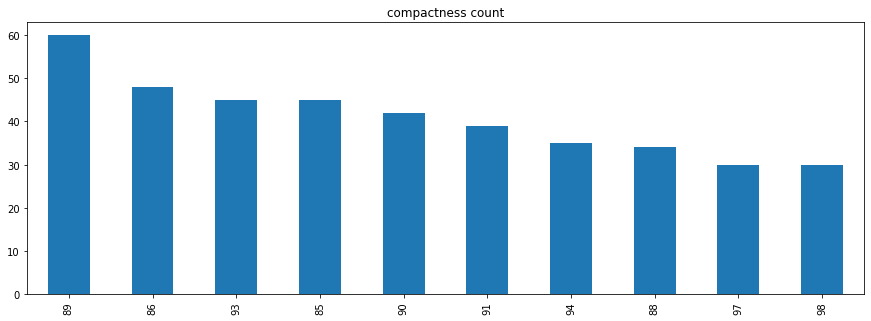

In [126]:
datavehicle.compactness.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("compactness count")



Text(0.5, 1.0, 'circularity')

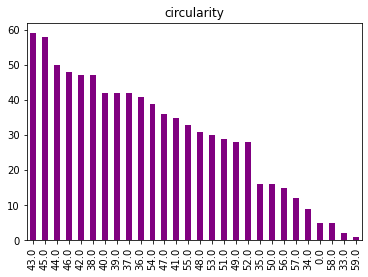

In [127]:
datavehicle['circularity'].value_counts().plot(kind='bar',color='purple')
plt.title("circularity")


Text(0, 0.5, 'type of class')

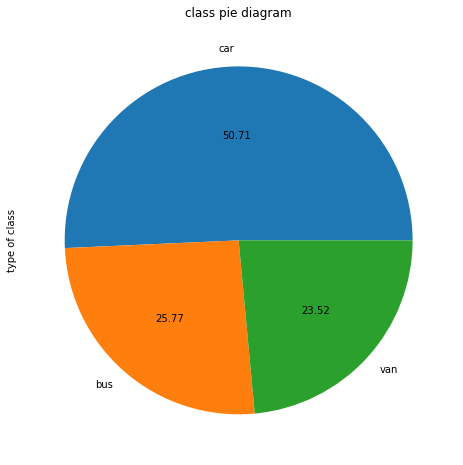

In [128]:
datavehicle['class'].value_counts().plot.pie(figsize=(8, 8), autopct='%.2f')
plt.title("class pie diagram")
plt.ylabel('type of class')


Text(0.5, 1.0, 'circularity diagram')

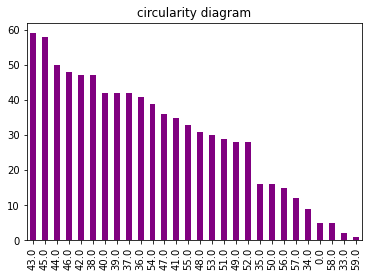

In [129]:
datavehicle['circularity'].value_counts().plot(kind='bar',color='purple')
plt.title("circularity diagram")


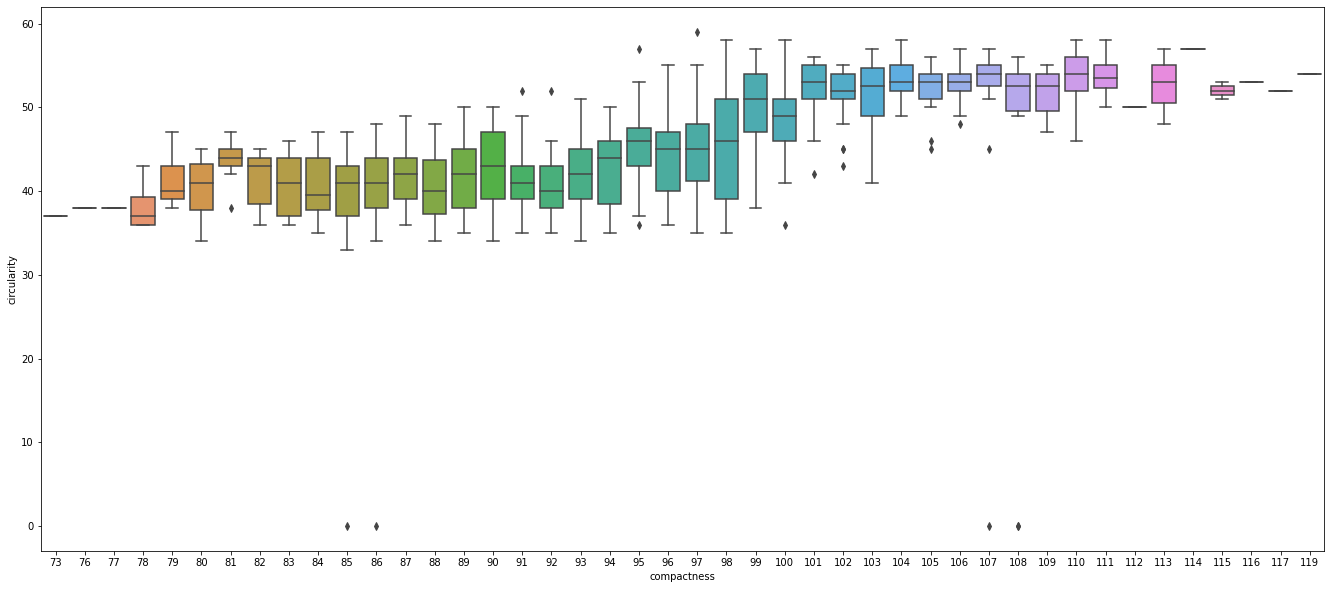

In [130]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="compactness", y="circularity", data=datavehicle)

C:\Users\nainap\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


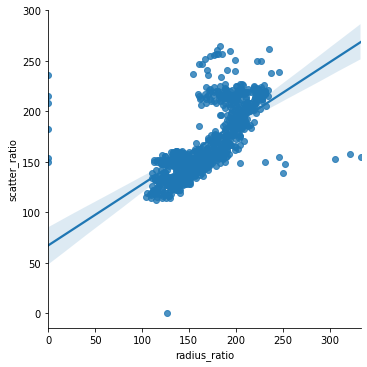

In [131]:
g = sns.lmplot('radius_ratio',"scatter_ratio", datavehicle);

C:\Users\nainap\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


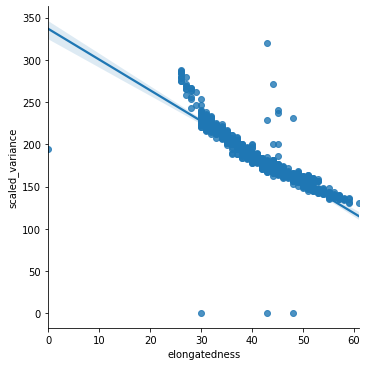

In [132]:
g = sns.lmplot('elongatedness',"scaled_variance", datavehicle);

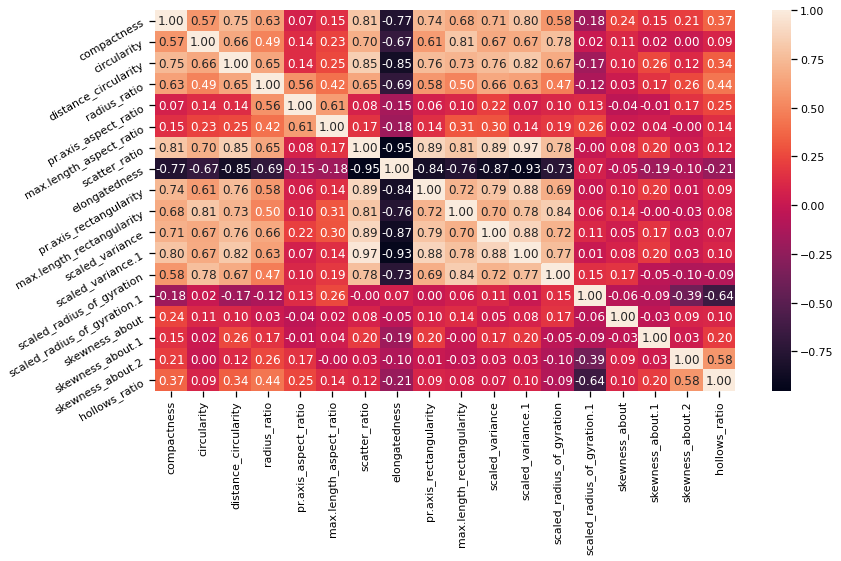

In [133]:
import seaborn as sns
corr = datavehicle.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

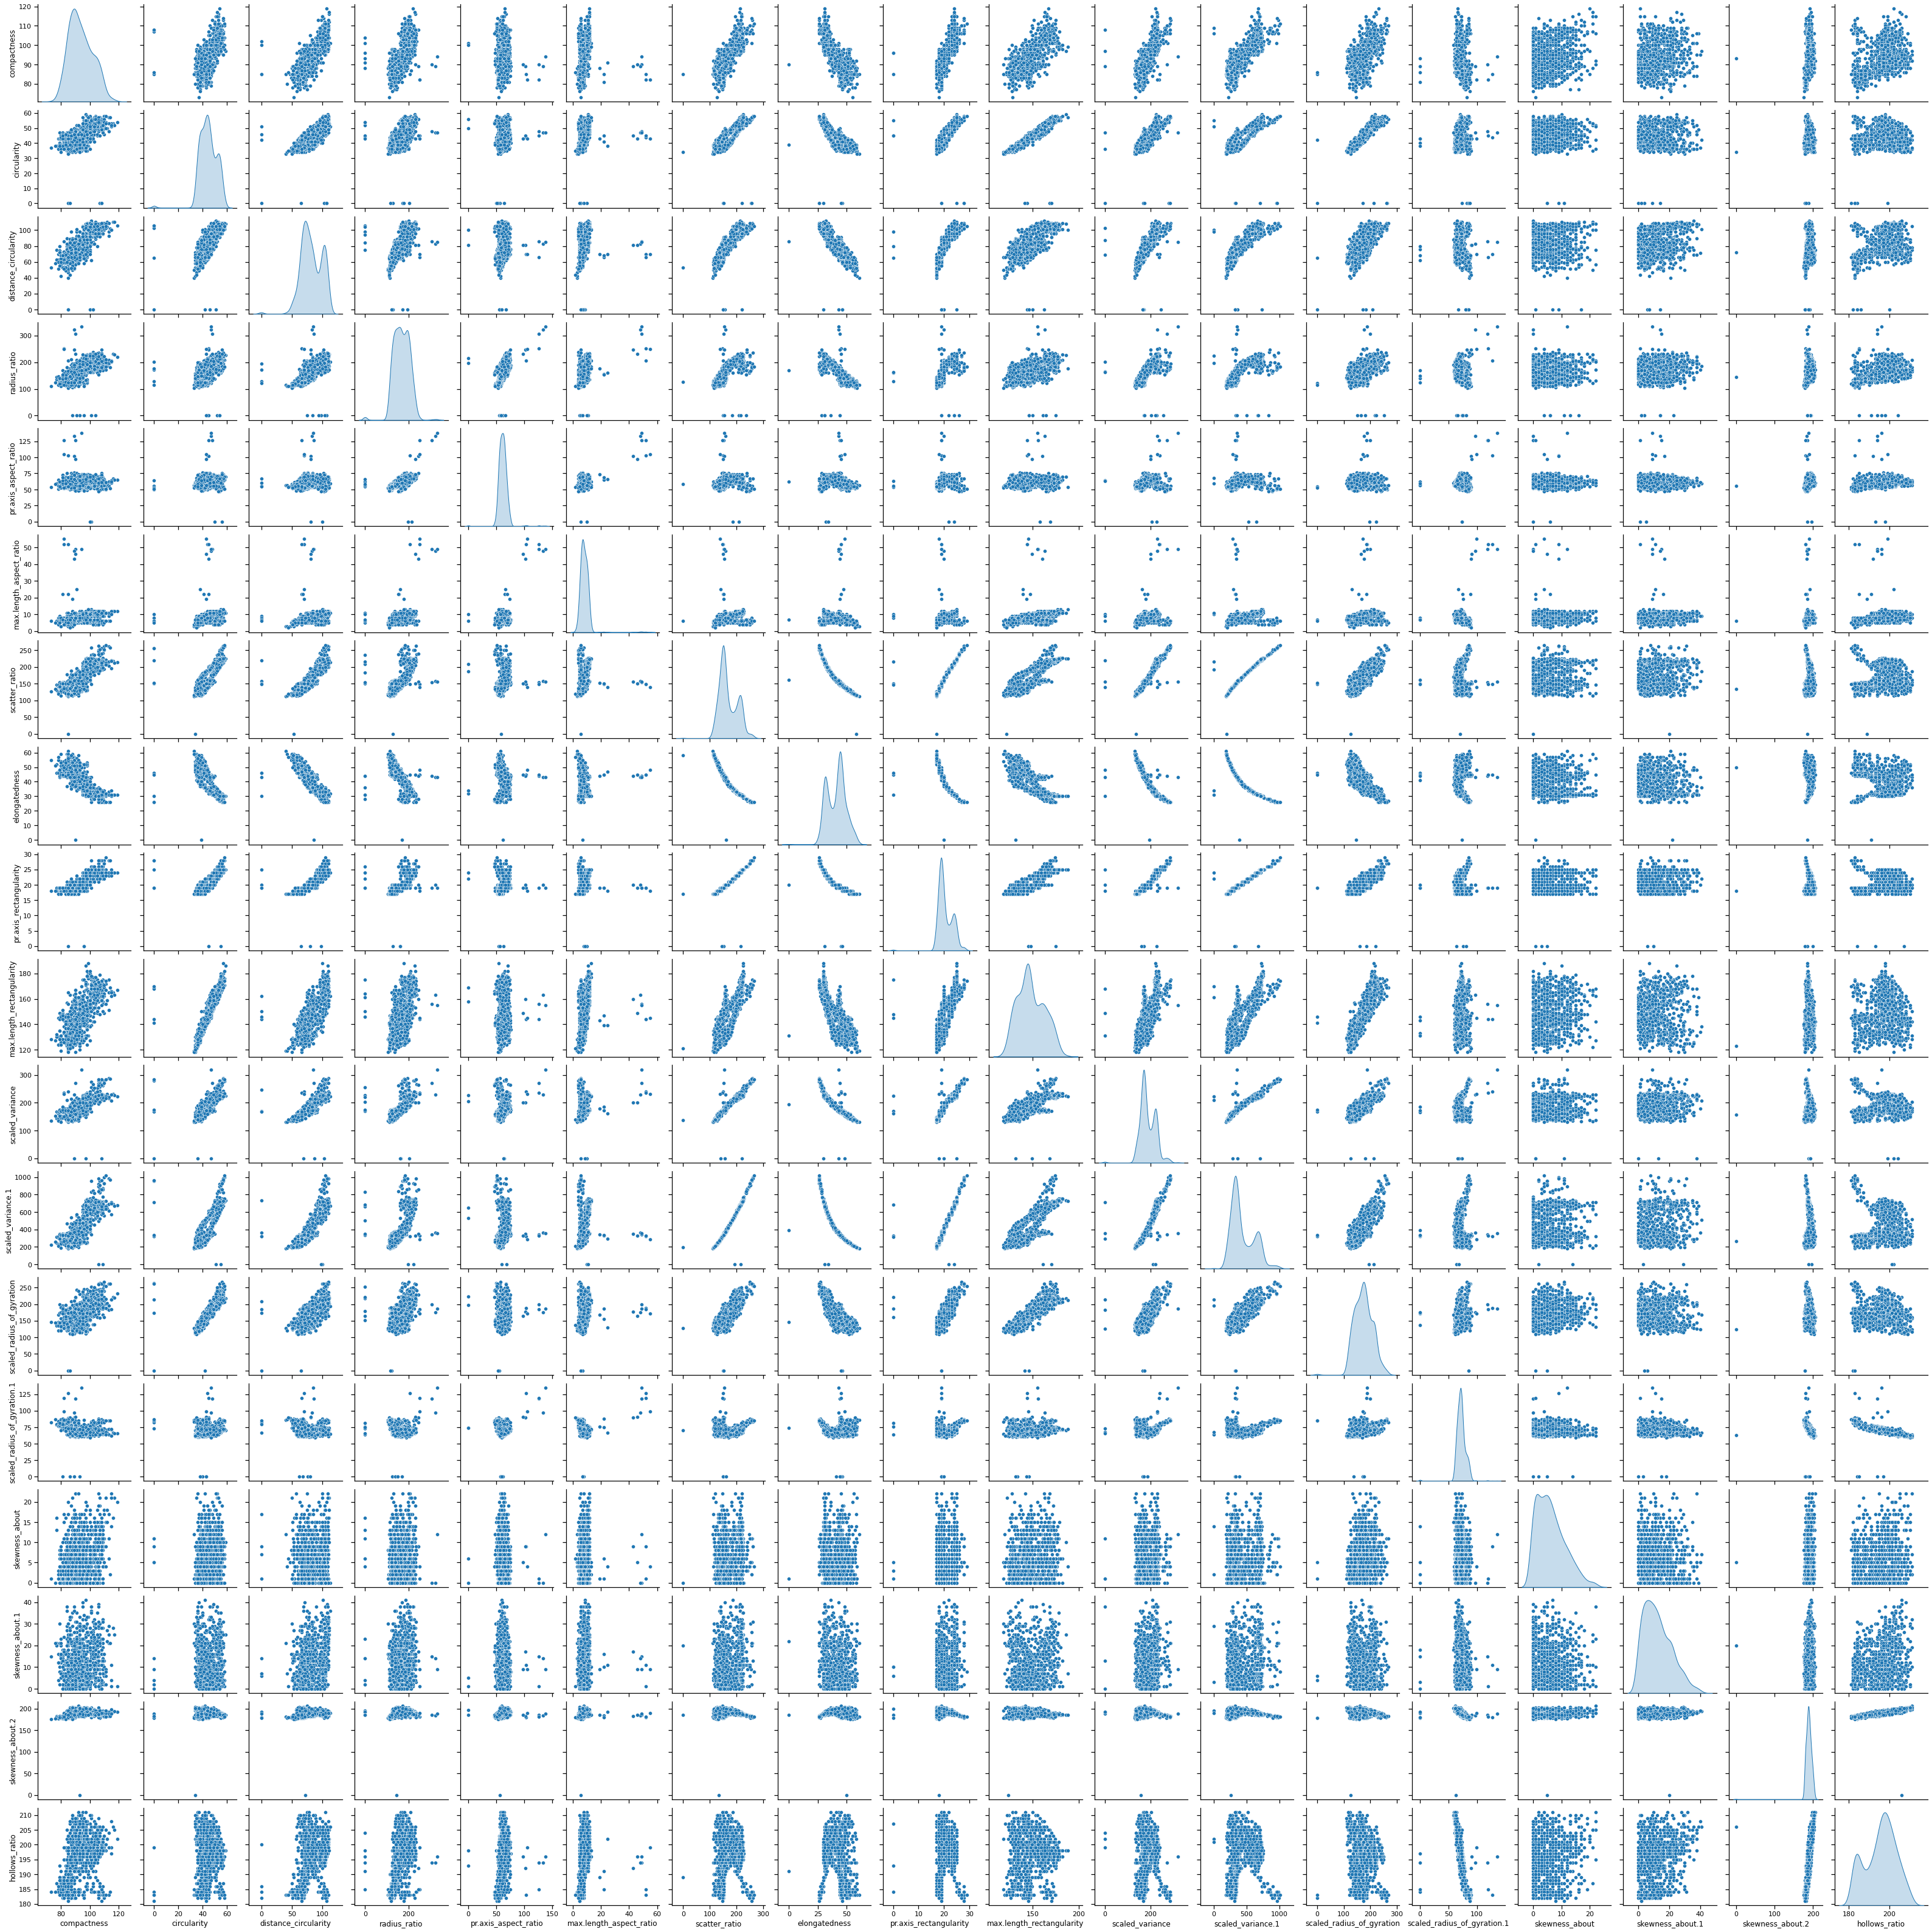

In [134]:
sns.pairplot(datavehicle,diag_kind='kde')

<AxesSubplot:>

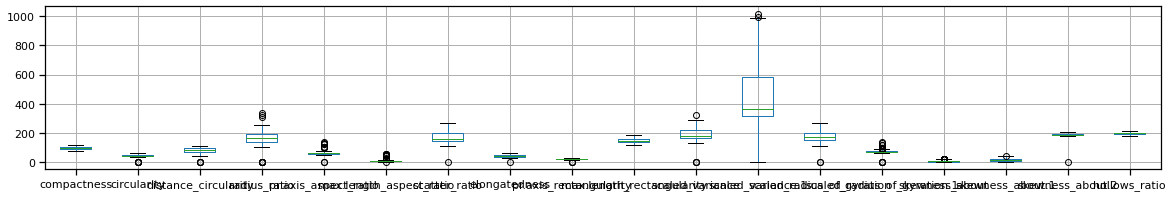

In [135]:
datavehicle.boxplot(figsize=(20,3))

In [136]:
pd.crosstab(datavehicle['circularity'], datavehicle['class'])

class        bus  car  van
circularity               
0.0            4    1    0
33.0           0    2    0
34.0           0    7    2
35.0           1    7    8
36.0           3   25   13
37.0           7   21   14
38.0           6   33    8
39.0           5   22   15
40.0           6   21   15
41.0          11   11   13
42.0          22   10   15
43.0          33   11   15
44.0          25   11   14
45.0          25   17   16
46.0          14   17   17
47.0          10   10   16
48.0           2   17   12
49.0           7   16    5
50.0           3   12    1
51.0           7   22    0
52.0           4   24    0
53.0           3   27    0
54.0           5   34    0
55.0           4   29    0
56.0           4   11    0
57.0           5    7    0
58.0           2    3    0
59.0           0    1    0

In [137]:
pd.crosstab(datavehicle['compactness'], datavehicle['class'])

class        bus  car  van
compactness               
73             0    1    0
76             0    1    0
77             0    2    0
78             1    3    0
79             2    3    0
80             6    6    0
81            12    1    0
82            11    7    1
83             8    4    5
84             7    9    4
85            19   14   12
86            19   15   14
87            12    9    7
88             7   15   12
89             8   23   29
90             4   15   23
91             6   19   14
92             4   14    7
93             4   19   22
94            10    8   17
95             4   13   10
96             9   12    9
97             6   19    5
98             9   15    6
99             6   11    0
100            8   16    2
101            4   19    0
102            5   12    0
103            1   17    0
104            2   25    0
105            3   14    0
106            5   14    0
107            5   14    0
108            2   12    0
109            3   11    0
110            3    4    0
111            1    3    0
112            0    2    0
113            1    2    0
114            1    0    0
115            0    3    0
116            0    1    0
117            0    1    0
119            0    1    0

In [138]:
# Drop id and class variables
data_new = datavehicle.drop(['class'], axis =1)

data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [139]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.488951              0.076470      0.284286   
1    -0.325470    -0.507116              0.136316     -0.735976   
2     1.254193     0.773541              1.452926      1.139100   
3    -0.082445    -0.507116              0.016624     -0.239632   
4    -1.054545    -0.080230             -0.701527      1.028802   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.241960                 0.311542      -0.198998   
1             -0.537879                 0.094079      -0.584991   
2              0.530024                 0.311542       1.137132   
3              0.174057                 0.094079      -0.733450   
4              4.920292                 9.444962      -0.584991   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.140516               -0.178035                   0.758332   
1       0.518700               -0.527497                  -0.344578   
2      -1.120101                0.870349                   0.689401   
3       0.644762               -0.527497                  -0.344578   
4       0.518700               -0.527497                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.359415          -0.334694                   0.288657   
1        -0.539691          -0.610532                  -0.484799   
2         1.052745           1.106421                   1.359595   
3        -0.840150          -0.728748                  -1.406996   
4         1.593572          -0.638679                   0.407650   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.234766       -0.064746          0.381885   
1                    -0.011732        0.543864          0.158072   
2                     0.099786        1.558214         -0.401462   
3                    -1.015388       -0.064746         -0.289555   
4                     6.121723        0.543864         -0.177649   

   skewness_about.2  hollows_ratio  
0         -0.189712       0.183957  
1          0.033976       0.452977  
2         -0.077868       0.049447  
3          1.152416       1.529056  
4         -0.972619      -1.699181

<AxesSubplot:>

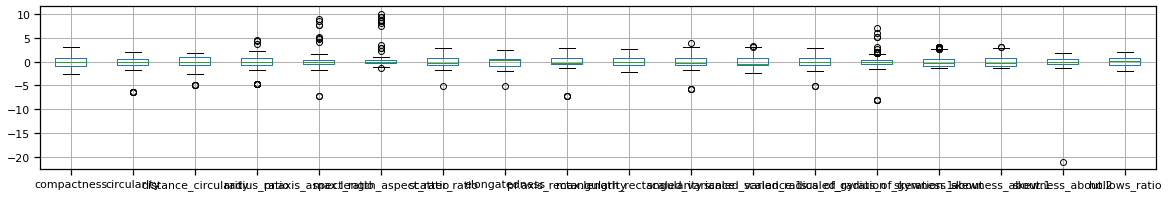

In [140]:
data_new.boxplot(figsize=(20,3))

In [141]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  5.75120921e-01  7.46475119e-01  6.28413256e-01
   7.14595695e-02  1.48424629e-01  8.07290678e-01 -7.74336126e-01
   7.40559574e-01  6.76943342e-01  7.08461947e-01  8.01114657e-01
   5.79105051e-01 -1.78523323e-01  2.41459793e-01  1.54483610e-01
   2.07593882e-01  3.65984455e-01]
 [ 5.75120921e-01  1.00118343e+00  6.61233165e-01  4.90178424e-01
   1.35207431e-01  2.32256958e-01  6.96370119e-01 -6.71459746e-01
   6.10960944e-01  8.13047484e-01  6.68788446e-01  6.73433065e-01
   7.76662438e-01  1.57710949e-02  1.12694511e-01  1.83317127e-02
   3.35067595e-03  8.84828187e-02]
 [ 7.46475119e-01  6.61233165e-01  1.00118343e+00  6.51940886e-01
   1.36468901e-01  2.54760684e-01  8.49856922e-01 -8.47984781e-01
   7.60761834e-01  7.26181943e-01  7.59880372e-01  8.24824437e-01
   6.72869419e-01 -1.69502385e-01  1.02817196e-01  2.58566372e-01
   1.19749422e-01  3.36909309e-01]
 [ 6.28413256e-01  4.90178424e-01  6.51940886e-01  1.00118343e+00
   5.63143998e-

In [142]:
 # Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.86283709e-01 -1.19858618e-01 -1.30816293e-01  7.60263815e-02
   8.56826230e-02  1.28057825e-01 -1.42457283e-01 -3.05982510e-01
  -5.58011820e-01 -1.82048387e-02 -1.44212005e-01  7.83918232e-02
  -1.84846548e-01  3.35790257e-01 -3.85759647e-01 -1.81671180e-01
  -2.75195929e-01  9.44206260e-04]
 [ 2.66821006e-01  9.95433566e-02  7.53983156e-03  1.97658008e-01
  -1.13226532e-01 -3.75220695e-01  3.77161038e-01  3.30337045e-01
  -2.59333804e-01  6.18882334e-03  7.50296713e-02  2.13222974e-01
   4.63062178e-02  1.37805562e-01  1.49635982e-01  3.07245967e-01
  -2.14404964e-01  4.15340046e-01]
 [ 3.03814242e-01 -8.27409622e-02 -5.95488304e-02 -7.26647176e-02
   3.03517484e-02 -1.64682971e-01 -1.47856477e-02 -1.16297131e-01
   1.93952557e-01 -2.19583785e-02 -9.66844745e-05 -1.97992815e-01
  -2.74080355e-02  6.05695545e-01  6.42992398e-03  1.84394870e-01
   6.08751088e-01  2.64451374e-02]
 [ 2.54513288e-01 -2.20904219e-01  2.60283302e-01 -6.54888128e-02
  -5.61257109e-02  

In [143]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 47.96409697  61.25692697  71.38986532  77.91042746  83.05480696
  86.64717064  89.56603885  91.89942703  93.39996004  94.59569598
  95.75285325  96.73024327  97.6577462   98.46226886  99.13110625
  99.57791655  99.89353407 100.        ]


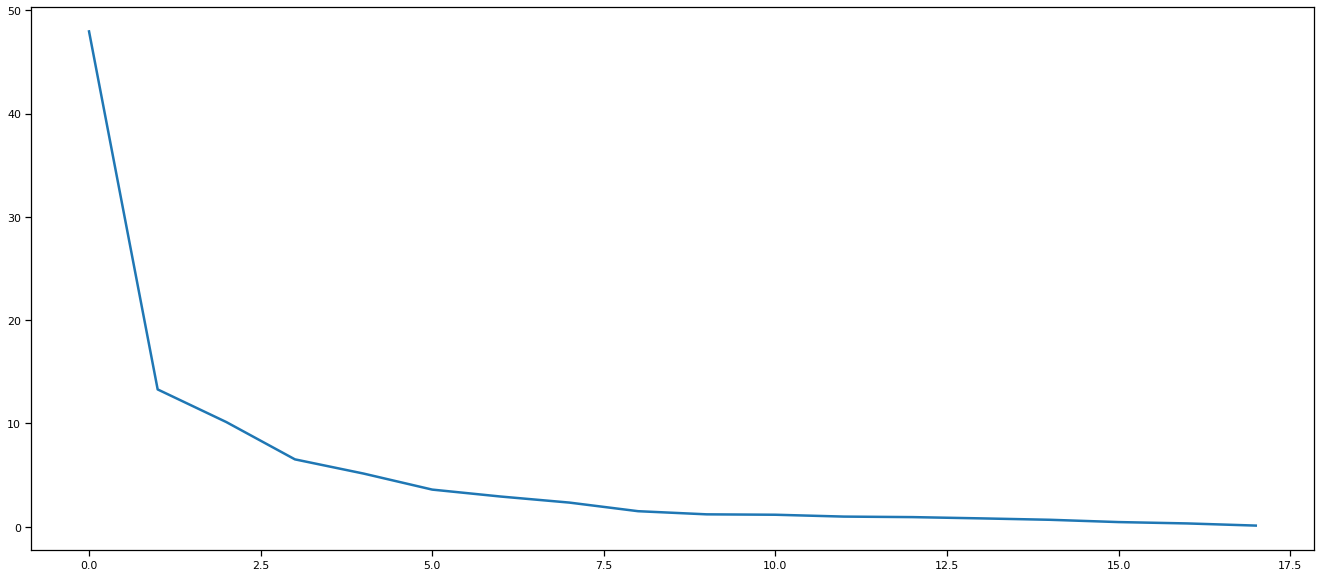

In [144]:
plt.plot(var_exp)

In [145]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 7 components here. But depending on requirement 90% variation or 5 components will also do good

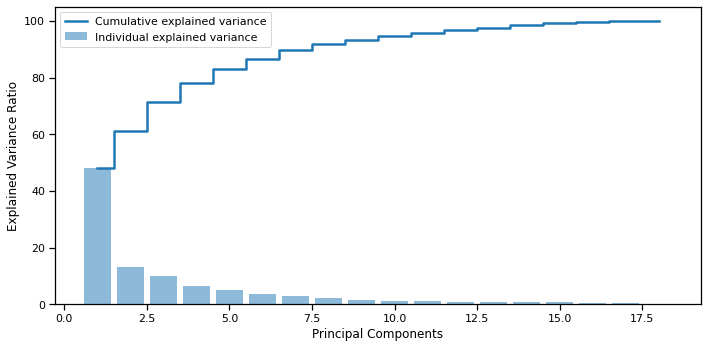

In [146]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [147]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[ 3.48639418e-01, -1.44676466e+00,  3.66404250e+00, ...,
         4.63107395e+00, -3.11116976e+00, -4.51066095e+00],
       [-3.63109478e-01, -4.11180520e-01,  1.52384898e-01, ...,
        -7.43103297e-02, -8.93509544e-01,  2.88431750e-01],
       [ 9.73964384e-01, -3.36309419e-01,  1.03856672e-01, ...,
         5.42339231e-01, -3.60926856e-01, -4.96722209e-01],
       ...,
       [ 7.30679516e-02,  6.88157734e-01,  7.57133234e-01, ...,
        -1.30487610e+00,  2.46853609e-03, -7.08430036e-02],
       [ 8.45401989e-01,  3.35289663e-01, -3.75412826e-01, ...,
         2.70888593e-01,  3.51928349e-01,  1.98948885e-01],
       [-1.26819829e-01, -2.17450733e-01,  6.71338990e-01, ...,
         6.65602654e-01, -2.63718832e-01, -3.42506232e-01]])

In [148]:
pca.components_

array([[ 0.28628371,  0.26682101,  0.30381424,  0.25451329,  0.07426246,
         0.1018924 ,  0.32739305, -0.32103197,  0.29981616,  0.29230509,
         0.30638221,  0.32154411,  0.2783999 , -0.01176852,  0.04504032,
         0.06296484,  0.03391235,  0.07900917],
       [-0.11985862,  0.09954336, -0.08274096, -0.22090422, -0.17599141,
        -0.03529098,  0.06170317,  0.00474479,  0.0661484 ,  0.12937801,
         0.07944238,  0.0731578 ,  0.2177128 ,  0.46750477, -0.05438337,
        -0.1474162 , -0.47652242, -0.57752261],
       [-0.13081629,  0.00753983, -0.05954883,  0.2602833 ,  0.62423774,
         0.5954543 , -0.09471164,  0.06454524, -0.10469912, -0.00199159,
         0.0565231 , -0.10703076, -0.01359672,  0.32919631, -0.11553078,
        -0.07753651, -0.02469952, -0.00459285],
       [-0.07602638, -0.19765801,  0.07266472,  0.06548881, -0.02630451,
        -0.03765813,  0.08715136, -0.0927221 ,  0.10155647, -0.1913065 ,
         0.1052475 ,  0.09276013, -0.2097143 ,  0.065

In [149]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(8.643754659373942,
  array([ 0.28628371,  0.26682101,  0.30381424,  0.25451329,  0.07426246,
          0.1018924 ,  0.32739305, -0.32103197,  0.29981616,  0.29230509,
          0.30638221,  0.32154411,  0.2783999 , -0.01176852,  0.04504032,
          0.06296484,  0.03391235,  0.07900917])),
 (2.395541008241567,
  array([-0.11985862,  0.09954336, -0.08274096, -0.22090422, -0.17599141,
         -0.03529098,  0.06170317,  0.00474479,  0.0661484 ,  0.12937801,
          0.07944238,  0.0731578 ,  0.2177128 ,  0.46750477, -0.05438337,
         -0.1474162 , -0.47652242, -0.57752261])),
 (1.8260873989022404,
  array([-0.13081629,  0.00753983, -0.05954883,  0.2602833 ,  0.62423774,
          0.5954543 , -0.09471164,  0.06454524, -0.10469912, -0.00199159,
          0.0565231 , -0.10703076, -0.01359672,  0.32919631, -0.11553078,
         -0.07753651, -0.02469952, -0.00459285])),
 (1.1750901805170921,
  array([ 0.07602638,  0.19765801, -0.07266472, -0.06548881,  0.02630451,
          0.03765813,

In [150]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = datavehicle.iloc[:,0:18].values
y = datavehicle.iloc[:,18].values

In [151]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [152]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [153]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[ 0.28628371 -0.11985862]
 [ 0.26682101  0.09954336]
 [ 0.30381424 -0.08274096]
 [ 0.25451329 -0.22090422]
 [ 0.07426246 -0.17599141]
 [ 0.1018924  -0.03529098]
 [ 0.32739305  0.06170317]
 [-0.32103197  0.00474479]
 [ 0.29981616  0.0661484 ]
 [ 0.29230509  0.12937801]
 [ 0.30638221  0.07944238]
 [ 0.32154411  0.0731578 ]
 [ 0.2783999   0.2177128 ]
 [-0.01176852  0.46750477]
 [ 0.04504032 -0.05438337]
 [ 0.06296484 -0.1474162 ]
 [ 0.03391235 -0.47652242]
 [ 0.07900917 -0.57752261]]


In [154]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))


Before PCA score 0.9529411764705882
After PCA score 0.6352941176470588


In [155]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  
print("\nConfusion Matrix using 'linear' SVC kernel:\n",confusion_matrix(y_test,y_pred))  
print("\nAccuracy score using 'linear' SVC kernel:\n",svclassifier.score(X_test,y_test))



Confusion Matrix using 'linear' SVC kernel:
 [[43  1  0]
 [ 4 82  3]
 [ 0  0 37]]

Accuracy score using 'linear' SVC kernel:
 0.9529411764705882


Dimensionality Reduction plays a really important role in machine learning, especially when you are working with thousands of features. Principal Components Analysis are one of the top dimensionality reduction algorithm, it is not hard to understand and use it in real projects. This technique, in addition to making the work of feature manipulation easier, it still helps to improve the results of the classifier, as we saw in this post.
Since here data size was not too high so PCA did not bring out good score. With large datasets it gives better results.

## Part 4

- <b>DOMAIN</b>: Sports management

- <b>CONTEXT</b>: Company X is a sports management company for international cricket.

- <b>DATA DESCRIPTION</b>: The data is collected belongs to batsman from IPL series conducted so far. Attribute 

Information:
    <ul style="list-style:none">
        <li>1. Runs: Runs score by the batsman</li>
        <li>2. Ave: Average runs scored by the batsman per match</li>
        <li>3. SR: strike rate of the batsman</li>
        <li>4. Fours: number of boundary/four scored</li>
        <li>5. Six: number of boundary/six scored</li>
        <li>6. HF: number of half centuries scored so far</li>
    </ul>
    
- <b>PROJECT OBJECTIVE</b>: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions. Steps and tasks: 
    1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
    2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [156]:
dataipl=pd.read_csv("C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\\Part4 - batting_bowling_ipl_bat.csv")

In [157]:
dataipl.shape

(180, 7)

Some of the values have zero in them like number of sixes, number of fours. But we won't impute them as they are right values in terms of cricket to say someone has not scored a 6 or a 4

In [158]:
dataipl.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [159]:
dataipl.describe().T

count        mean         std    min      25%      50%       75%  \
Runs    90.0  219.933333  156.253669   2.00   98.000  196.500  330.7500   
Ave     90.0   24.729889   13.619215   0.50   14.665   24.440   32.1950   
SR      90.0  119.164111   23.656547  18.18  108.745  120.135  131.9975   
Fours   90.0   19.788889   16.399845   0.00    6.250   16.000   28.0000   
Sixes   90.0    7.577778    8.001373   0.00    3.000    6.000   10.0000   
HF      90.0    1.188889    1.688656   0.00    0.000    0.500    2.0000   

          max  
Runs   733.00  
Ave     81.33  
SR     164.10  
Fours   73.00  
Sixes   59.00  
HF       9.00

### EDA and visualisation

Univariate analysis

In [160]:
def plotKdeAndBoxPlot(data, x, feature_name, color):
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(x = x, data=dataipl,  orient='h' , ax=axes[1],color=color)
    sns.kdeplot(data=dataipl,x=x, ax=axes[0],fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=1)
    axes[0].set_title('Distribution plot for '+feature_name)
    axes[1].set_title('Box plot for '+ feature_name)
    plt.show()
    return

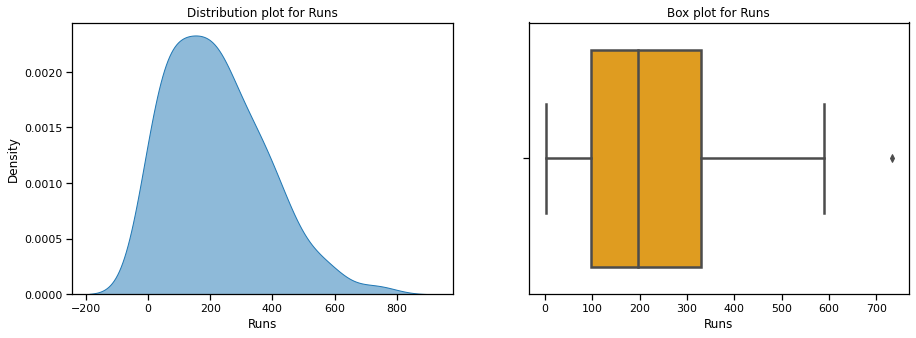

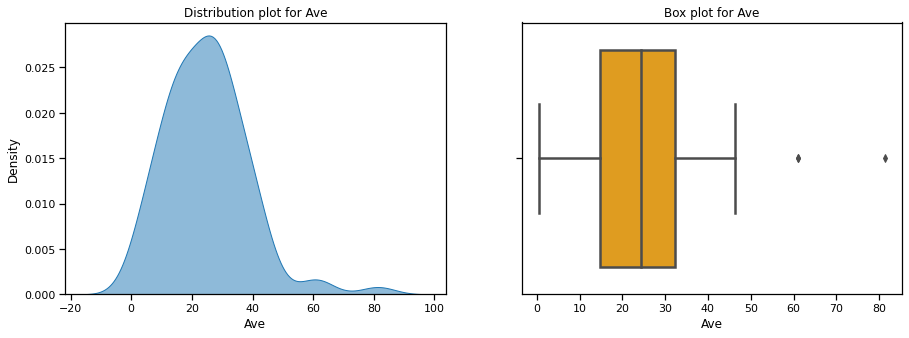

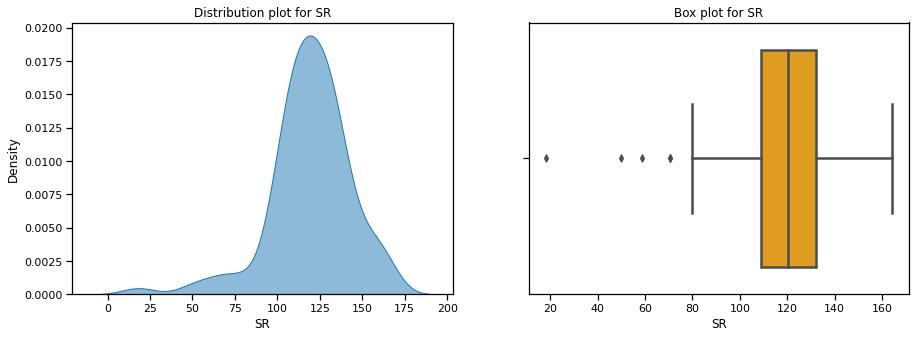

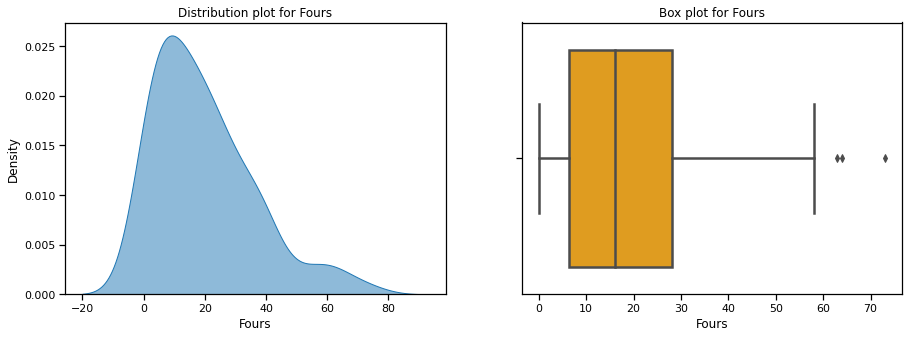

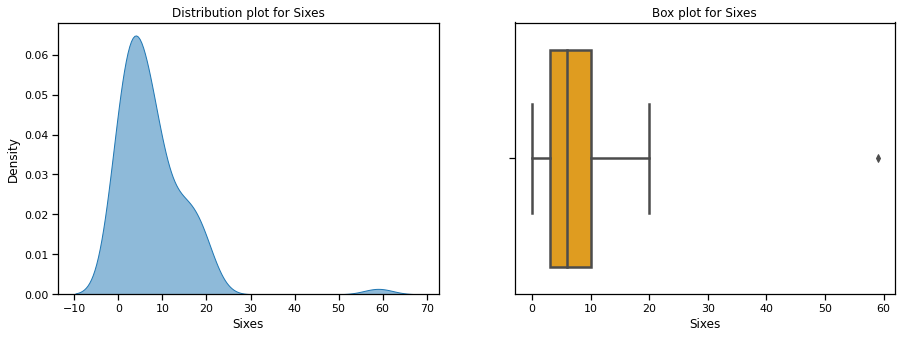

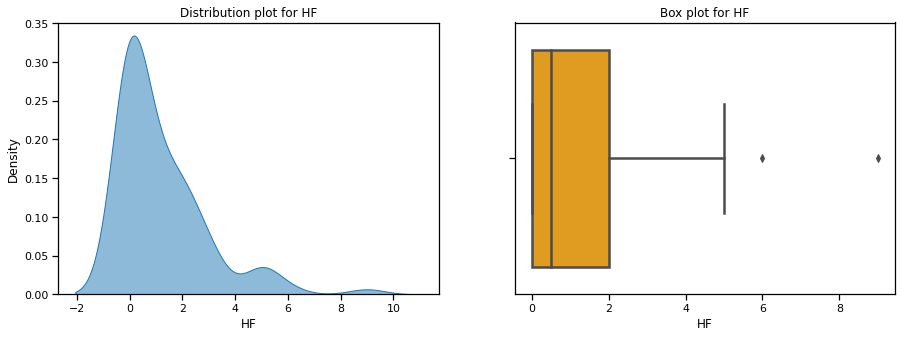

In [161]:
for col in dataipl.columns[1:7]: # iterating columns except Name column
    plotKdeAndBoxPlot(dataipl, col,col,'orange')

Runs

Data is slightly left skewed with min value of 2 and max runs of 733. Only single outlier.
Ave

Data is left skewed and we can see couple of outliers
SR

Data is right skewed with few having strike rate b/w 20 to 80 as outlier.
Fours

Data is left skewed with few outliers
Sixes

Data is highly left skewed with a single outlier
HF

Data is left skewed without a min whisker.It has couple of outlier

## Bivariate Analysis

<AxesSubplot:xlabel='SR', ylabel='Ave'>

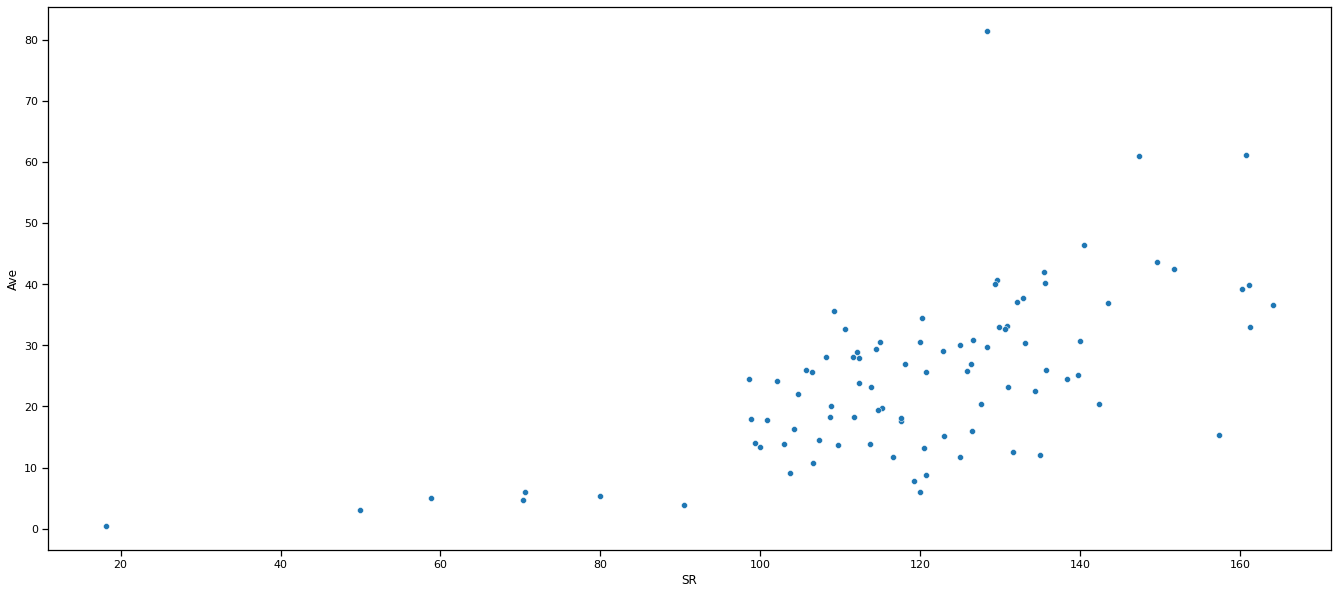

In [162]:
#average vs strike rate
sns.scatterplot(data=dataipl, x="SR", y="Ave")

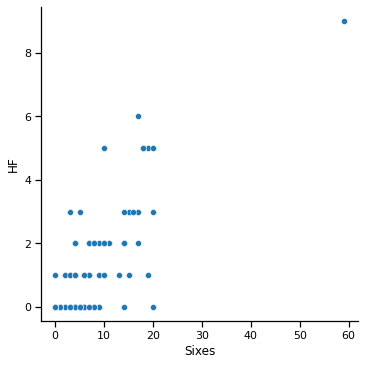

In [163]:
#Six vs HF
sns.relplot(data=dataipl, x="Sixes", y="HF")


## Multivariate analysis

In [164]:
dataipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


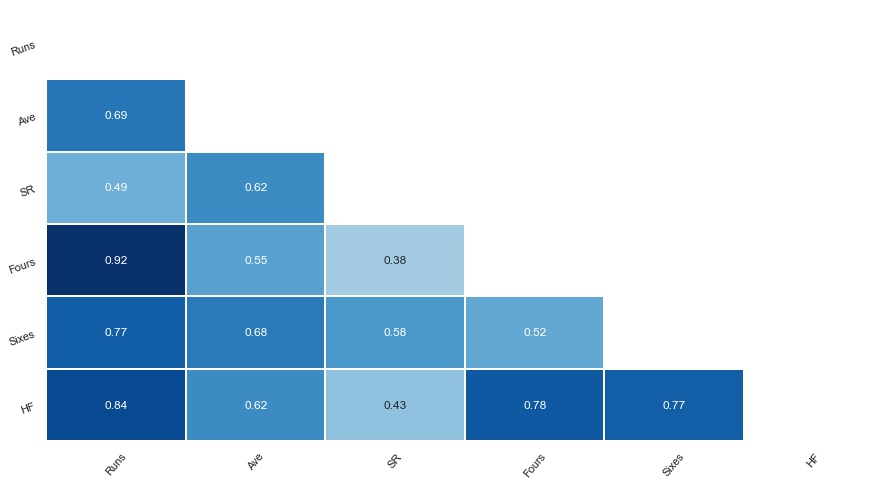

In [165]:
# Heatmap
#Correlation Matrix
corr = dataipl.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

<AxesSubplot:>

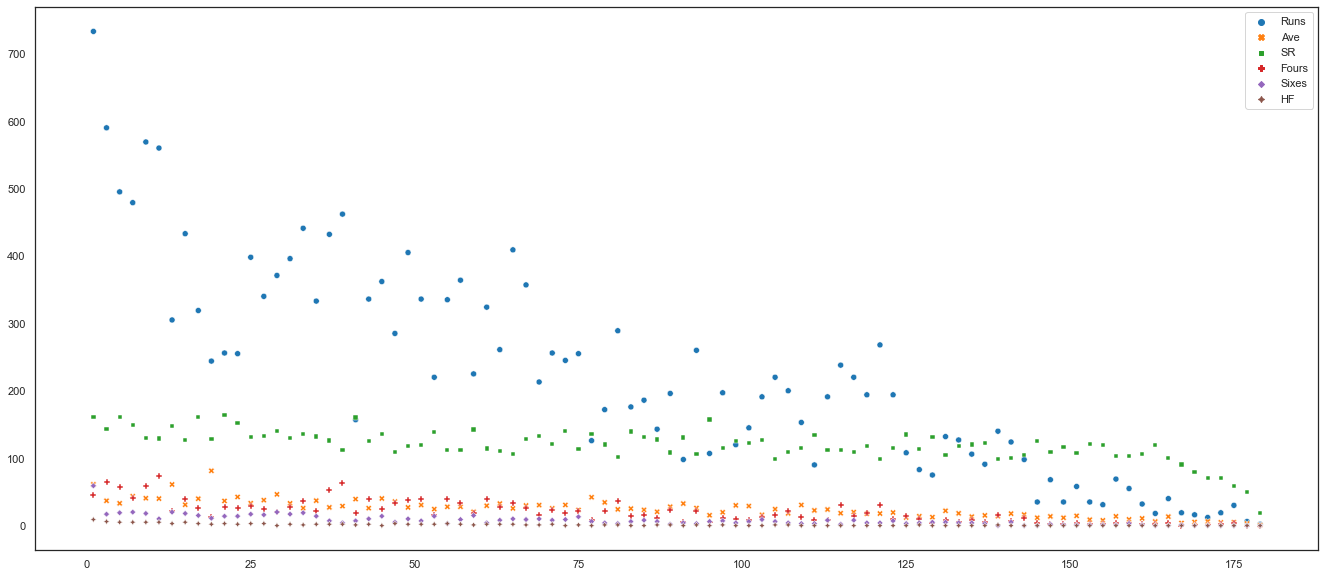

In [166]:
sns.scatterplot(data=dataipl)

In [167]:
#dataipl = dataipl.replace(np.nan, 0)
dataipl.dropna(inplace=True)

In [168]:
#dropping/ignoring Name
dataipl1 = dataipl.drop(['Name'], axis=1)
dataipl1.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [169]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
dataipl2=dataipl1.apply(zscore)
dataipl2.head(10)

Runs       Ave        SR     Fours     Sixes        HF
1   3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3   2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5   1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7   1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9   2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
11  2.188568  1.127500  0.432136  3.262788  0.304422  2.269533
13  0.547464  2.678077  1.197712  0.135580  1.561209  1.078525
15  1.371234  0.457059  0.316088  1.177983  1.309851  2.269533
17  0.637564  1.117901  1.783053  0.380852  0.932815  1.078525
19  0.154886  4.179184  0.393453 -0.416280  0.430100  0.483020

<AxesSubplot:>

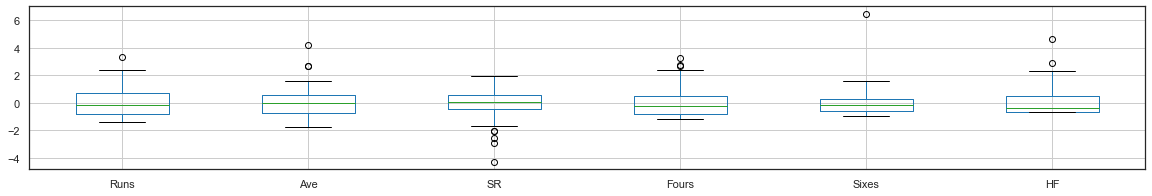

In [170]:
dataipl2.boxplot(figsize=(20,3))

In [171]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(dataipl2.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [172]:
 # Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [173]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.91199612  84.696562    91.56369501  96.98815324  99.71877694
 100.        ]


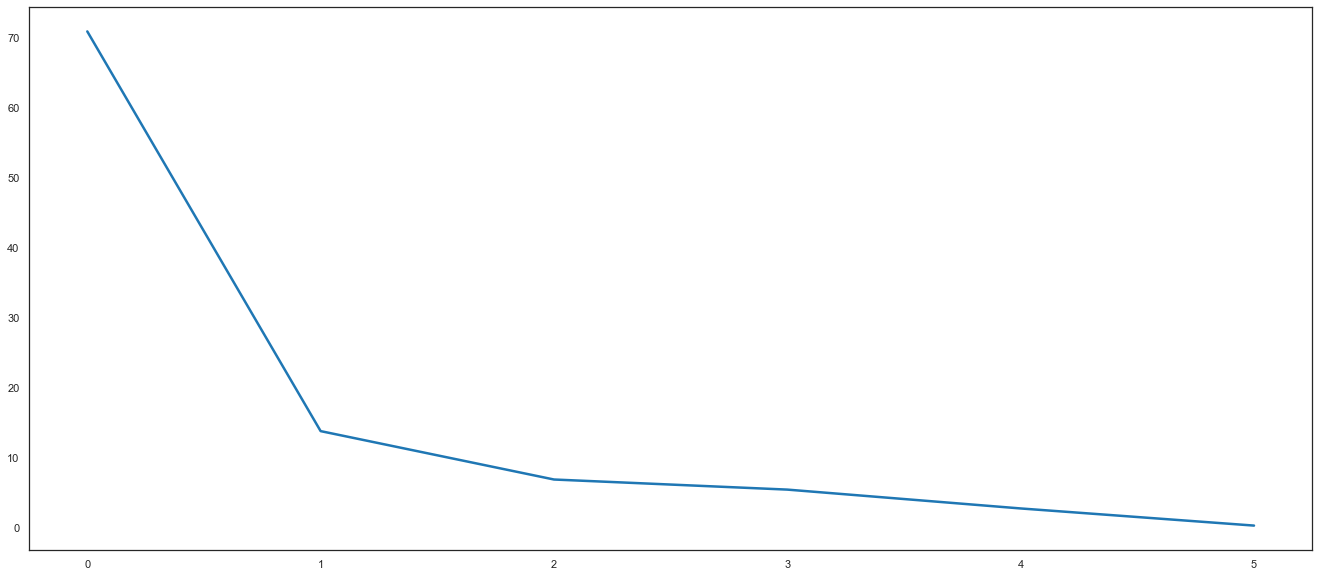

In [174]:
plt.plot(var_exp)

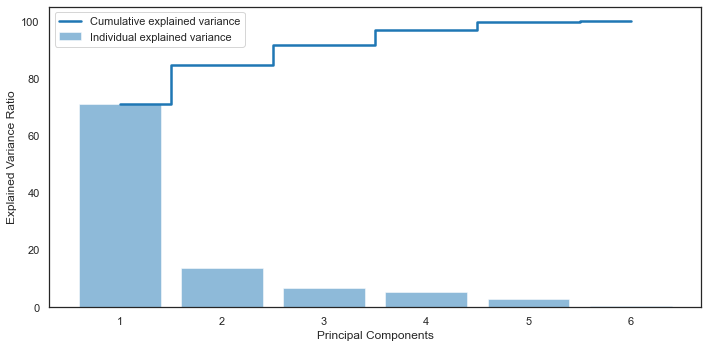

In [175]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [176]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 9 to 6)

pca = PCA(n_components=6)
dataipl_reduced = pca.fit_transform(dataipl2)
dataipl_reduced.transpose()
pca_df = pd.DataFrame(data = dataipl_reduced, columns = ['PC 1', 'PC 2','PC3','PC4','PC5','PC6'])

print(pca_df)

        PC 1      PC 2       PC3       PC4       PC5       PC6
0   8.516774 -0.354575  3.672474 -0.996267  0.133045 -0.240478
1   4.618340  1.476730 -0.503630 -0.594494 -0.612669  0.133733
2   4.142251  0.471438 -0.557204 -1.101184 -0.434291 -0.172245
3   3.899411  0.041816  0.262143 -0.228085 -0.547244  0.209469
4   4.120072  1.401002 -0.116643 -0.014712 -0.156918  0.062712
..       ...       ...       ...       ...       ...       ...
85 -3.006639  0.972067  0.818102  0.129328 -0.166558 -0.074524
86 -3.000751  1.049898  0.785502  0.052754 -0.129568 -0.073557
87 -3.070959  1.463324  0.936508  0.276508 -0.028739 -0.124155
88 -3.422022  1.616542  1.246073  0.322403 -0.063750 -0.101638
89 -3.947402  2.614667  1.856743  0.751466  0.103966 -0.184673

[90 rows x 6 columns]


In [177]:
pca.components_

array([[ 0.4582608 ,  0.39797313,  0.3253838 ,  0.40574167,  0.41733459,
         0.43237178],
       [ 0.26643209, -0.33111756, -0.69780334,  0.47355804, -0.17902455,
         0.27593225],
       [-0.10977942,  0.00550486, -0.45013448, -0.50823538,  0.66942589,
         0.28082541],
       [-0.00520142,  0.84736307, -0.43275029, -0.03252305, -0.24878157,
        -0.17811777],
       [ 0.45840889, -0.10122837, -0.11890348,  0.09676885,  0.39458014,
        -0.77486668],
       [ 0.70483594, -0.0606373 ,  0.05624934, -0.58514214, -0.35786211,
         0.16096217]])

In [178]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:6]

[(4.302525607296717,
  array([-0.4582608 , -0.39797313, -0.3253838 , -0.40574167, -0.41733459,
         -0.43237178])),
 (0.8363669184835516,
  array([-0.26643209,  0.33111756,  0.69780334, -0.47355804,  0.17902455,
         -0.27593225])),
 (0.4166575087767156,
  array([ 0.10977942, -0.00550486,  0.45013448,  0.50823538, -0.66942589,
         -0.28082541])),
 (0.32912443199301633,
  array([ 0.00520142, -0.84736307,  0.43275029,  0.03252305,  0.24878157,
          0.17811777])),
 (0.16567829190781486,
  array([-0.45840889,  0.10122837,  0.11890348, -0.09676885, -0.39458014,
          0.77486668])),
 (0.017062971879264442,
  array([-0.70483594,  0.0606373 , -0.05624934,  0.58514214,  0.35786211,
         -0.16096217]))]

In [179]:
 #Sort the (eig_v, eigenvector) pairs from lowest to highest with respect to eigenvalue

 #Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs[index][1] for index in range(len(eig_vecs))]


In [180]:
eigen_space = np.array(eig_vecs[0:6]).transpose()

proj_data_3D = np.dot(dataipl2, eigen_space)
new_proj_data = pd.DataFrame(proj_data_3D, index=dataipl2.index, columns=dataipl2.columns)
new_proj_data.head(10)
# multiplying all eigen g

Runs       Ave        SR     Fours     Sixes        HF
1  -3.477020 -4.132639  5.812220  1.703694 -4.068295 -2.193727
3  -3.158689 -2.747984  1.887470 -0.351576 -1.612128  0.834425
5  -3.110841 -2.093936  1.649140  0.621489 -1.286231  0.547401
7  -2.461412 -1.925044  2.193240  0.166250 -0.976649 -0.339295
9  -2.573907 -2.171284  1.914144 -0.695190 -1.805063  0.484989
11 -3.058389 -2.065961  1.557470 -1.256275 -1.483471  1.520034
13 -1.693750 -0.167263  2.808871  0.025897 -0.150712 -1.309728
15 -1.357346 -2.186291  1.566797  0.037678 -1.154362  0.179306
17 -1.913347 -0.655941  1.404235  0.727575  0.065731 -0.645878
19 -1.221212  0.892218  3.196853 -1.537119  0.820841 -1.640781

In [181]:
pca_sum = new_proj_data.sum(axis=1) 
#summing all features row wise.

In [182]:
# Sorting the value based on their ranks from 1 to 90 based on their Score.

In [183]:
dataipl5 = pd.DataFrame(pca_sum,columns=['Score'])
data3 = pd.concat([dataipl,dataipl5],axis=1)
data3.sort_values(by=['Score'],ascending=True)
data3['Rank'] = np.arange(1,91)
data3

Name   Runs    Ave      SR  Fours  Sixes   HF     Score  Rank
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0 -6.355766     1
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0 -5.148483     2
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0 -3.672979     3
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0 -3.342910     4
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0 -4.846312     5
..           ...    ...    ...     ...    ...    ...  ...       ...   ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0  2.632636    86
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0  2.507169    87
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0  2.303675    88
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0  2.610052    89
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0  2.526977    90

[90 rows x 9 columns]

As seen above Chris Gayle has scored rank 1 . Followed by G Gambhir and V Sehwag. R Sharma is at the last rank.

In [184]:
dataipl.to_csv('C:\\Users\\nainap\\Downloads\\AIML\\Unsupervised\scricketer_ranks.csv',index=False)

Exporting the ranking csv file to the local for future reference

## Part 5


- <b>Questions</b>: 
    1. List down all possible dimensionality reduction techniques that can be implemented using python.
    2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

## List down all possible dimensionality reduction techniques that can be implemented using python.

Feature selection:

a) Missing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.
b) Low Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped.
c) High Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly.
d) Random Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.
e) Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets.
Components / Factor Based:

a) Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.
b) Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.
c) Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components.
Projection Based:

a) ISOMAP: We use this technique when the data is strongly non-linear.
b) t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well.
c) UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE.

(156, 194, 3)


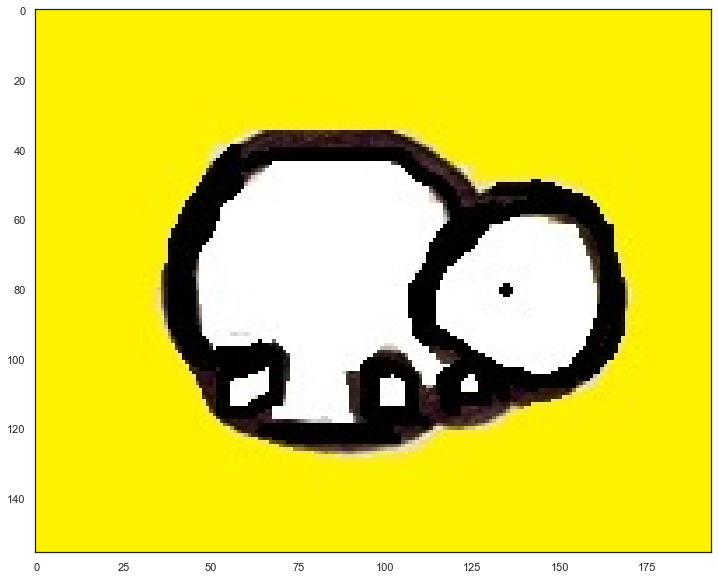

In [185]:
import matplotlib.image as mpimg
img = mpimg.imread('C:\\Users\\nainap\\Downloads\\logo_small.png')
print(img.shape)
plt.imshow(img)

Loading the image

(156, 194, 3)


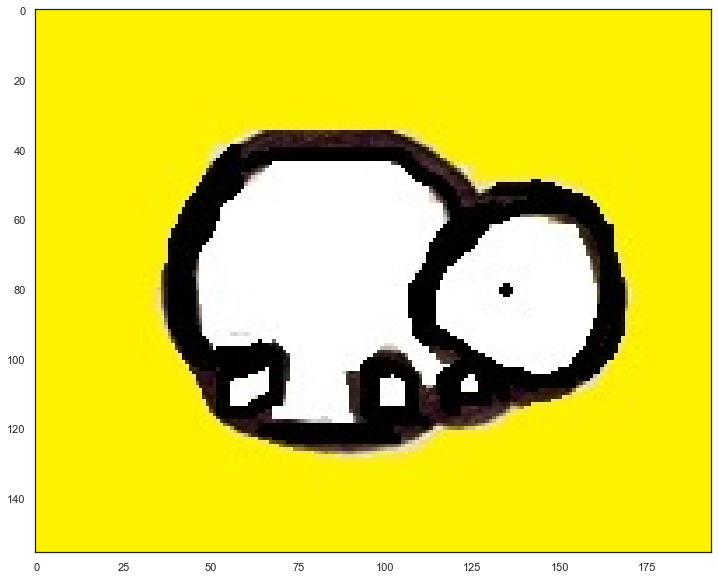

In [186]:
print(img.shape) 
#Showing the image
plt.imshow(img)

checking shape of te image

In [187]:
img_r = np.reshape(img, (156, 582)) 
print(img_r.shape)

(156, 582)


reshaping the image and then applying PCA with n = 32

In [188]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape) 
print(np.sum(pca.explained_variance_ratio_) )

(156, 32)
0.98748434


variance ratio of the image is 98 %

In [189]:
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (156, 194 ,3)) 
print(temp.shape) 


(156, 582)
(156, 194, 3)


checking shape of pca dataframe

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


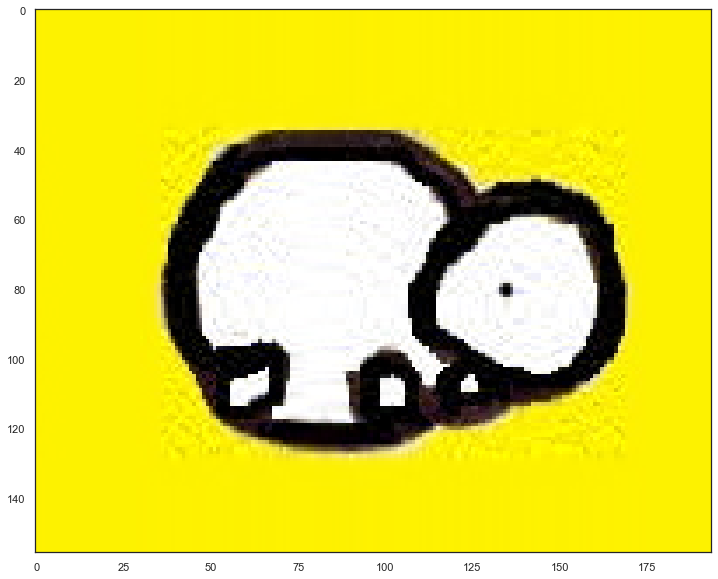

In [190]:
plt.imshow(temp)

Now again checking its image

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
mean = X_train.mean()
sd = X_train.std()
X_test = (X_test - mean)/sd
X_train = StandardScaler().fit_transform(X_train)


Doing test train model on before PCA one dataframe

In [192]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  
print("\nConfusion Matrix using 'linear' SVC kernel:\n",confusion_matrix(y_test,y_pred))  
print("\nAccuracy score using 'linear' SVC kernel:\n",svclassifier.score(X_test,y_test))



Confusion Matrix using 'linear' SVC kernel:
 [[48 17  0]
 [40 93  0]
 [53  3  0]]

Accuracy score using 'linear' SVC kernel:
 0.5551181102362205


In [193]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(img_r)
var = pca.explained_variance_ratio_
pca.components_[0]
#How compressed data is distributed.
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([38.77    , 60.46    , 73.409996, 80.21    , 85.02    , 87.88    ,
       90.13    , 91.59    , 92.579994, 93.41999 , 94.05999 , 94.63999 ,
       95.12999 ], dtype=float32)

In [194]:
z =pca_values[:,2]

In [195]:
new_df = pd.DataFrame(z)


### Importing another images as well

In [196]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X = np.load('C://Users//nainap//Downloads//X.npy')
Y = np.load('C://Users//nainap//Downloads//Y.npy')

In [197]:
X.shape

(2062, 64, 64)

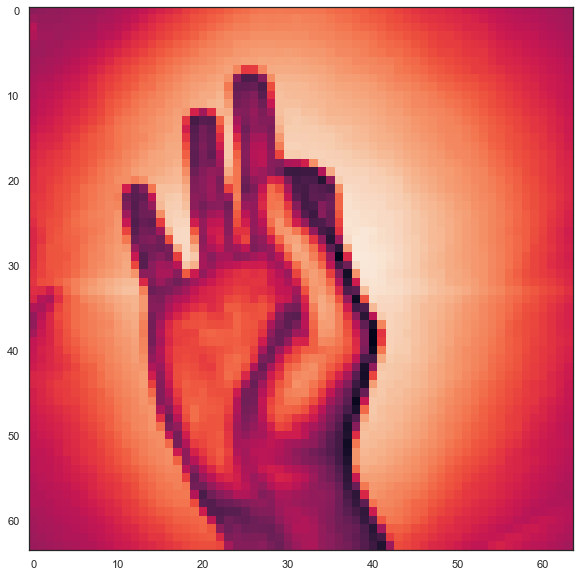

In [198]:
plt.imshow(X[0])

In [199]:
9 - np.argmax(Y[0])

9

In [200]:
X_flat = np.array(X).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [201]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

In [202]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

C:\Users\nainap\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20), random_state=1)

In [203]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3344103392568659


In [204]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [205]:
d

292

In [206]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [207]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


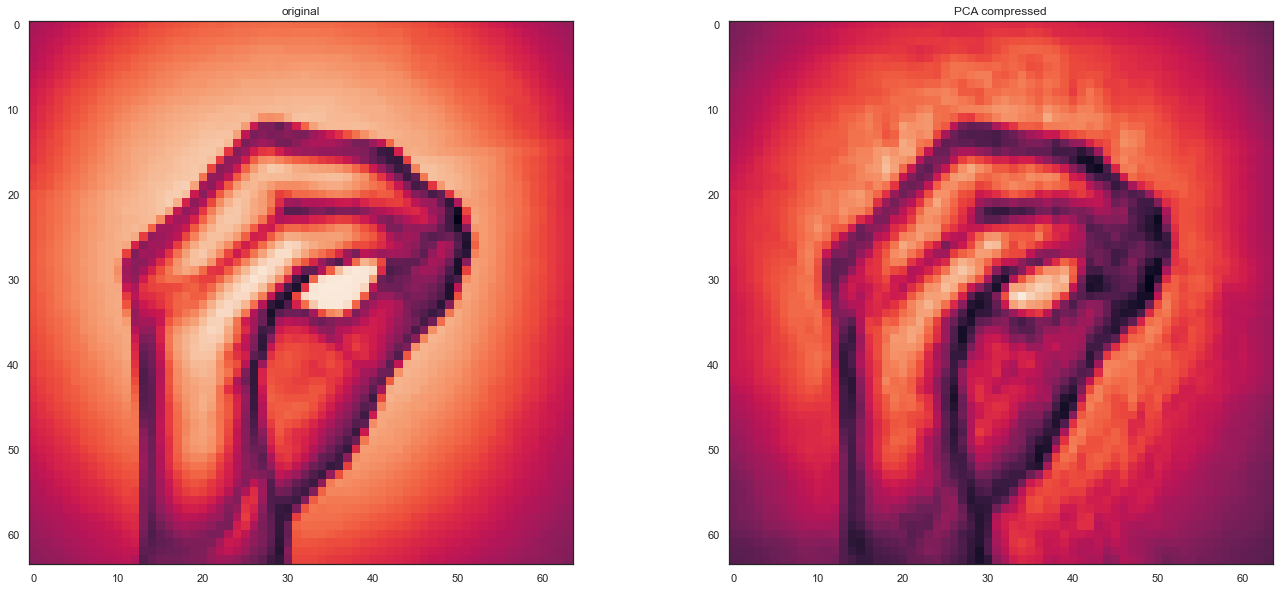

In [208]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

In [209]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

C:\Users\nainap\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 20, 20))

In [210]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6558966074313409


### Accuracy of the model is 62 percent after doing PCA and before that it was 33 percent. PCA has improved the score